In [1]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import uniform
import math
from math import isnan
from random import sample

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors, NearestCentroid
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster import hierarchy

# **Problem**

The Roosevelt National Forest in Colorado is a significant ecological area that encompasses diverse forest ecosystems. Understanding the characteristics of trees within this forest is crucial for effective forest management, ecological studies, and environmental research.

The objective of this problem, is to use unsupervised learning to form clusters to uncover patterns, structures and relationships within the data

# **Database**
The data set used in this problem is the Forest covertype obtained through UCI Machine Learning Repository.

This data set consists of 581.012 rows, where each row consist of an observation of a 30 m x 30 m section of the Roosevelt National Forest.
Each one of the 54 Column of this data set is a cartographic variables of said section.

The variables can be classified in the following categories:
* Tree Type
* Shadow Coverage
* Distance to Nearby Landmarks
* Soil type
* Local Topography
    

In [2]:
url = "https://drive.google.com/file/d/1VIqEO9mNBwiY0HK0OzH4EQMdjD0R90GR/view?usp=sharing"
url = "https://drive.google.com/uc?id=" + url.split('/')[-2]
covertype = pd.read_csv(url, header=None)
covertype

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


The data doesn't come with the column names assigned, so they must be assigned manually.

In [3]:
column_labels = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
     "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
for i in range(4):
  column_labels.append("Wilderness_Area" + str(i))
for i in range(40):
  column_labels.append("Soil_Type" + str(i))
column_labels.append("Cover_Type")

covertype.columns = column_labels
covertype

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


# **Preprocessing**

## Missing values
Most models can't handle missing values. To avoid having any problems occur during clustering, instances with missing data must be handled.

To do this, first, it is checked if the data has any missing values in the first place.

In [4]:
covertype.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area0                      0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Soil_Type0                            0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


This shows that none of the columns of the dataframe posses missing values, therefore, no extra measures have to be taken in regards to them.

Had the dataframe missing values, assuming there weren't too many, the respective instances would have simply been dropped.

## Qualitative data

Sometimes, dataframes can contain Qualitative data which don't have an order or scale. This data can confuse models if not handled properly. Even worse if they are represented in strings.

So that the models perform the best possible, these data must be transformed.

To determine if the dataframe contains any data of this type, first the type of the data contained in each column is checked.

In [5]:
covertype.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area0                      int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Soil_Type0                            int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

It can be seen that all the columns contain only integer data.

In [6]:
pd.set_option('display.max_columns', 500)
covertype.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area0,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Soil_Type0,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

It can be observed the first 9 columns are quantitative, while the rest are qualitative.

Column "Cover_type" is the label representing the covertype, which shall be discarded (since the experiment is about clustering).

The rest of the qualitative columns all have binary values: 0 or 1. This means that no additional preprocessing is required.

In [7]:
#Label is removed
covertype_c = covertype.drop(["Cover_Type"], axis=1)
covertype_c

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area0,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Soil_Type0,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Sampling



The dataset used has a huge amount of instances in it. Trying to cluster all of them would take considerably processing power and time. A sample of 1% is randomly selected from the full data.

In [8]:
covertype_sample = covertype_c.sample(frac=0.005, random_state=0)
covertype_sample

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area0,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Soil_Type0,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39
215988,2767,66,17,210,18,1190,234,204,96,2251,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
424155,2724,160,19,60,4,1350,236,240,127,2514,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
274437,2360,65,7,127,21,1377,227,226,134,339,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65944,2995,45,4,285,30,5125,221,231,146,5706,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11015,2400,106,27,150,63,342,253,196,51,811,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203330,3124,308,14,30,9,4834,180,230,190,1140,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96381,3050,17,11,630,34,3782,211,216,141,4657,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
542695,3285,121,15,285,15,3543,244,227,108,1266,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
119465,3054,307,2,175,33,3936,213,237,163,2670,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Standarization

Data is standarized so that no one column has more influence than others.

In [9]:
sc = StandardScaler()
covertype_sta = sc.fit_transform(covertype_sample)

## Outliers

For outlier detection, Local Outlier Factor is used.

This determines the local deviation of density of a sample compared to its neighbours. In other words, it calculates how isolated a sample is compared to its closest samples. If the density of the sample is much lower than those of the neighbours, then it's deemed an outlier (marked with -1).

In [10]:
lof = LocalOutlierFactor()
outlier_scores = lof.fit_predict(covertype_sta)
unique, counts = np.unique(outlier_scores, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 222, 1: 2683}


In [11]:
not_outlier_indices = outlier_scores == 1
covertype_processed = covertype_sta[not_outlier_indices]

# Unsupervised Learning

## Tendency to form clusters

Not all data will always form clusters, which means that sometimes, attempting to apply clustering methods isn't viable.

To avoid wasting time, it's common to use certain metrics beforehand to determine the data's tendency to form clusters.

In this experiment, the tendency shall be calculated using Hopkins statistic. The closer the returned value is to 1, the higher the tendency of the data to form clusters. If the value obtained is around 0.7 or lower, then the data probably doesn't have any significant clusters.

In [12]:
# Function obtained from:
# https://github.com/mhatim99/Hopkins-Test/blob/master/Hopkins%20Test.ipynb
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0

    return H

In [13]:
hopkins(pd.DataFrame(covertype_processed))

0.9362784608012847

From this, a value approximate to 0.94 is obtained. In other words, the data should be easily clusterizable.

## Model Selection

To determine which clustering method is most appropriate, evaluation metrics must be defined. For this, 3 different evaluation metrics shall be used: Silhouette Coefficient, Calinski Harabasz Score, Davies Bouldin Score. All as implemented in scikit-learn.

To avoid redundancy, a function that calls and prints the results of all the metrics is defined.

In [14]:
def report(X, labels):
  sil = silhouette_score(X, labels)
  chs = calinski_harabasz_score(X, labels)
  dbs = davies_bouldin_score(X, labels)
  print("Silhouette Coefficient:", sil)
  print("Calinski Harabasz Score:", chs)
  print("Davies Bouldin Score:", dbs)
  return sil, chs, dbs

Four different clustering algorithms shall be tested in the following experiments, with the goal of figuring out which one is most appropriate for the data used. These are:
- Spectral Clustering
- Agglomerative Clustering
- K - Means
- Bisecting K - Means.

To reduce the manual labor involved in trying to find which combination of algorithm and n_clusters is most optimal, we construct a model for every combination of algorithm and n_clusters ([5, 30]), and calculate their results for each of the metrics evaluated. This way, we get an in-depth view of how each algorithm works at different number of clusters.

In [15]:
classifier_titles = ["Spectral Clustering", "Agglomerative Clustering", "K - Means", "Bisecting K - Means"]
min_n_clusters = 5
max_n_clusters = 31

In [16]:
results = []
for k in range(min_n_clusters, max_n_clusters):
    models = [
        SpectralClustering(n_clusters=k, random_state=0),
        AgglomerativeClustering(n_clusters=k, linkage='ward'),
        KMeans(n_clusters=k, random_state=0),
        BisectingKMeans(n_clusters=k, random_state=0)
    ]
    for i in range(len(classifier_titles)):
        model_title = str(classifier_titles[i]) + " (n_clusters = " + str((k))+")"
        clusters = models[i].fit(covertype_processed)
        sil = silhouette_score(covertype_processed, clusters.labels_)
        chs = calinski_harabasz_score(covertype_processed, clusters.labels_)
        dbs = davies_bouldin_score(covertype_processed, clusters.labels_)
        results.append([model_title, classifier_titles[i], k, sil, chs, dbs])

D:\Development\Projects\TCDP2\venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 361 with accuracies 
[5.20262830e-14 5.07584311e-05 3.09608200e-05 3.99460075e-05
 5.21965969e-05 3.89740707e-05]
not reaching the requested tolerance 3.997981548309326e-05.
Use iteration 361 instead with accuracy 
3.5472654347363676e-05.

  _, diffusion_map = lobpcg(
D:\Development\Projects\TCDP2\venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[4.85871687e-14 5.07584305e-05 3.09608208e-05 3.99460078e-05
 5.21965972e-05 3.89740700e-05]
not reaching the requested tolerance 3.997981548309326e-05.
  _, diffusion_map = lobpcg(
D:\Development\Projects\TCDP2\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, de

For ease of view and processing, the results are transformed into a DataFrame.

In [17]:
results_df = pd.DataFrame(data=results, columns=["Model", "Classifier", "n_clusters", "Silhouette Coefficient", "Calinski Harabasz Score", "Davies Bouldin Score"])
results_df

,Model,Classifier,n_clusters,Silhouette Coefficient,Calinski Harabasz Score,Davies Bouldin Score
0,Spectral Clustering (n_clusters = 5),Spectral Clustering,5,0.101187,17.078690,1.095222
1,Agglomerative Clustering (n_clusters = 5),Agglomerative Clustering,5,0.120504,184.705951,2.389096
2,K - Means (n_clusters = 5),K - Means,5,0.117093,182.457873,2.090136
3,Bisecting K - Means (n_clusters = 5),Bisecting K - Means,5,0.135319,151.595808,2.474231
4,Spectral Clustering (n_clusters = 6),Spectral Clustering,6,0.227147,44.320786,1.037772
...,...,...,...,...,...,...
99,Bisecting K - Means (n_clusters = 29),Bisecting K - Means,29,0.350310,268.968449,1.267282
100,Spectral Clustering (n_clusters = 30),Spectral Clustering,30,0.129134,69.751447,1.167824
101,Agglomerative Clustering (n_clusters = 30),Agglomerative Clustering,30,0.374602,362.760081,1.036183
102,K - Means (n_clusters = 30),K - Means,30,0.350847,367.864129,1.044938


From this dataset, we extract the top 5 best performing models for each metric.

In [18]:
metrics = [["Silhouette Coefficient", False], ["Calinski Harabasz Score", False], ["Davies Bouldin Score", True]]
for metric in metrics:
    print("Top 5 models for", metric[0])
    aux = results_df[["Model", metric[0]]]
    if metric[1]:
        print(aux.nsmallest(5, metric[0]))
    else:
        print(aux.nlargest(5, metric[0]))

    print("======================")

Top 5 models for Silhouette Coefficient
                                         Model  Silhouette Coefficient
73  Agglomerative Clustering (n_clusters = 23)                0.423938
66                 K - Means (n_clusters = 21)                0.421528
69  Agglomerative Clustering (n_clusters = 22)                0.420122
65  Agglomerative Clustering (n_clusters = 21)                0.408863
62                 K - Means (n_clusters = 20)                0.400613
Top 5 models for Calinski Harabasz Score
                                         Model  Calinski Harabasz Score
82                 K - Means (n_clusters = 25)               381.813006
77  Agglomerative Clustering (n_clusters = 24)               380.070198
90                 K - Means (n_clusters = 27)               379.638278
74                 K - Means (n_clusters = 23)               379.141053
73  Agglomerative Clustering (n_clusters = 23)               378.886334
Top 5 models for Davies Bouldin Score
                       

While this greatly reduces the amount of models to consider and gives us all the information required to determine which model is best, we further reduce the amount of manual labour by automatically assigning each model a rank based on how well they did in each metric, for each metric. The best performing model in a particular metric gets rank 0, the second best rank 1, and so on. After obtaining the rank of each model in each metric, the three rankings obtained by the model are summed together, giving us the model's overall score (the lower the better). The models are sorted in ascending order based in their overall score, leaving the best performing models at the top.

In [19]:
ranked_results_df = results_df
for metric in metrics:
    ranked_results_df = ranked_results_df.sort_values(by=[metric[0]], ascending=metric[1])
    ranked_results_df[(metric[0] + " rank")] = range(0, len(results_df))
ranked_results_df["Summed rank"] = ranked_results_df[(metrics[0][0] + " rank")] + ranked_results_df[(metrics[1][0] + " rank")] + ranked_results_df[(metrics[2][0] + " rank")]
ranked_results_df = ranked_results_df.sort_values(by="Summed rank", ascending=True)
ranked_results_df

,Model,Classifier,n_clusters,Silhouette Coefficient,Calinski Harabasz Score,Davies Bouldin Score,Silhouette Coefficient rank,Calinski Harabasz Score rank,Davies Bouldin Score rank,Summed rank
73,Agglomerative Clustering (n_clusters = 23),Agglomerative Clustering,23,0.423938,378.886334,0.895739,0,4,2,6
69,Agglomerative Clustering (n_clusters = 22),Agglomerative Clustering,22,0.420122,374.638334,0.894592,2,9,1,12
82,K - Means (n_clusters = 25),K - Means,25,0.388000,381.813006,0.937098,9,0,4,13
74,K - Means (n_clusters = 23),K - Means,23,0.392631,379.141053,0.940272,5,3,5,13
66,K - Means (n_clusters = 21),K - Means,21,0.421528,368.936848,0.878610,1,14,0,15
...,...,...,...,...,...,...,...,...,...,...
32,Spectral Clustering (n_clusters = 13),Spectral Clustering,13,0.102969,45.490615,1.404233,94,95,63,252
3,Bisecting K - Means (n_clusters = 5),Bisecting K - Means,5,0.135319,151.595808,2.474231,80,71,102,253
28,Spectral Clustering (n_clusters = 12),Spectral Clustering,12,0.060259,38.003761,1.402718,103,97,62,262
11,Bisecting K - Means (n_clusters = 7),Bisecting K - Means,7,0.127256,144.317276,2.452935,86,76,101,263


From this, we can observe that the best performing model is Agglomerative Clustering with n_clusters = 23, followed by Agglomerative Clustering with n_clusters = 22 (which solidifies Agglomerative's Clustering superiority). Based on this, Agglomerative Clustering is chosen as the model to use.

## Optimal number of groups

The optimal amount of groups has already been obtained from the previous process, however, to confirm this and better visualize the performance of the model at each metric, we graph the scores obtained.

First, we filter the results to only the Agglomerative Clustering results

In [20]:
agg_results_df = ranked_results_df[ranked_results_df["Classifier"] == "Agglomerative Clustering"]
agg_results_df

,Model,Classifier,n_clusters,Silhouette Coefficient,Calinski Harabasz Score,Davies Bouldin Score,Silhouette Coefficient rank,Calinski Harabasz Score rank,Davies Bouldin Score rank,Summed rank
73,Agglomerative Clustering (n_clusters = 23),Agglomerative Clustering,23,0.423938,378.886334,0.895739,0,4,2,6
69,Agglomerative Clustering (n_clusters = 22),Agglomerative Clustering,22,0.420122,374.638334,0.894592,2,9,1,12
77,Agglomerative Clustering (n_clusters = 24),Agglomerative Clustering,24,0.390251,380.070198,0.967477,7,1,8,16
81,Agglomerative Clustering (n_clusters = 25),Agglomerative Clustering,25,0.383419,377.887435,0.980431,12,5,9,26
65,Agglomerative Clustering (n_clusters = 21),Agglomerative Clustering,21,0.408863,348.512082,0.985697,3,19,10,32
89,Agglomerative Clustering (n_clusters = 27),Agglomerative Clustering,27,0.382010,374.176030,0.991617,15,10,13,38
85,Agglomerative Clustering (n_clusters = 26),Agglomerative Clustering,26,0.376335,376.460421,1.009950,17,6,16,39
93,Agglomerative Clustering (n_clusters = 28),Agglomerative Clustering,28,0.379983,370.022473,0.987187,16,12,11,39
97,Agglomerative Clustering (n_clusters = 29),Agglomerative Clustering,29,0.369512,366.292732,1.023546,20,16,17,53
101,Agglomerative Clustering (n_clusters = 30),Agglomerative Clustering,30,0.374602,362.760081,1.036183,18,18,19,55


### Silhouette Coefficient
Higher is better

<Axes: xlabel='n_clusters', ylabel='Silhouette Coefficient'>

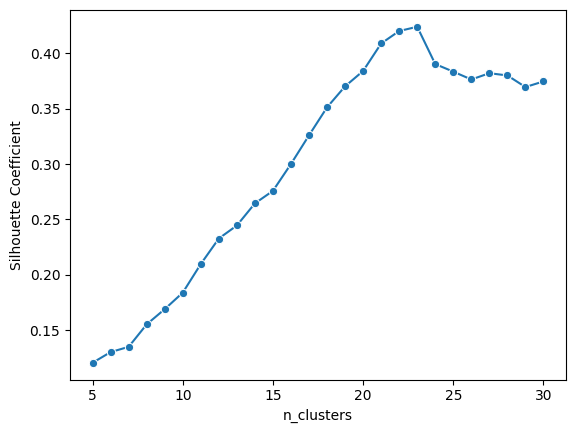

In [21]:
sns.lineplot(data=agg_results_df, x="n_clusters", y="Silhouette Coefficient", marker='o')

Reaches a plateau around n_clusters = 23, but stops having significant improvements around n_clusters = 21.

### Calinski Harabasz Score
Higher is better

<Axes: xlabel='n_clusters', ylabel='Calinski Harabasz Score'>

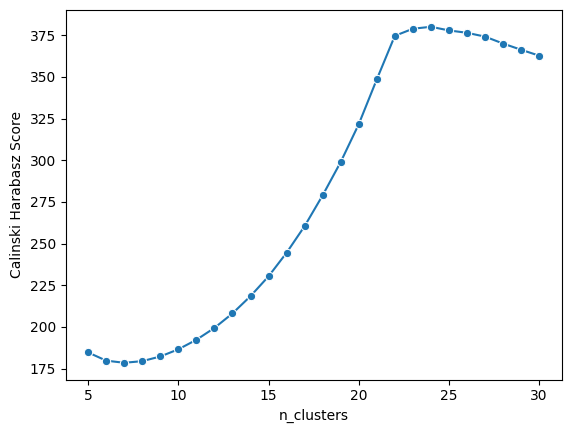

In [22]:
sns.lineplot(data=agg_results_df, x="n_clusters", y="Calinski Harabasz Score", marker='o')

Reaches a plateau around n_clusters = 24, but stops having significant improvements around n_clusters = 22.

### Davies Bouldin Score
Lower is better

<Axes: xlabel='n_clusters', ylabel='Davies Bouldin Score'>

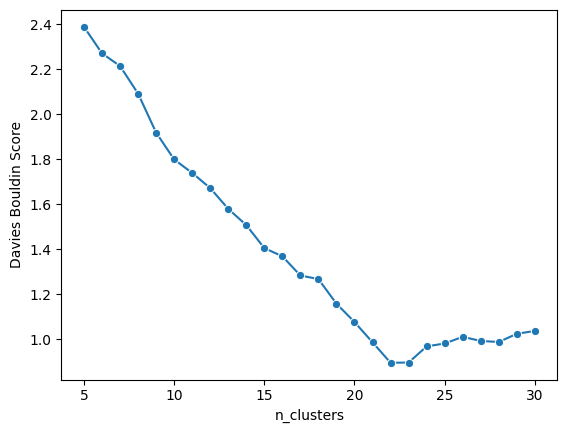

In [23]:
sns.lineplot(data=agg_results_df, x="n_clusters", y="Davies Bouldin Score", marker='o')

Reaches a plateau at n_clusters = 22.

### Dendogram

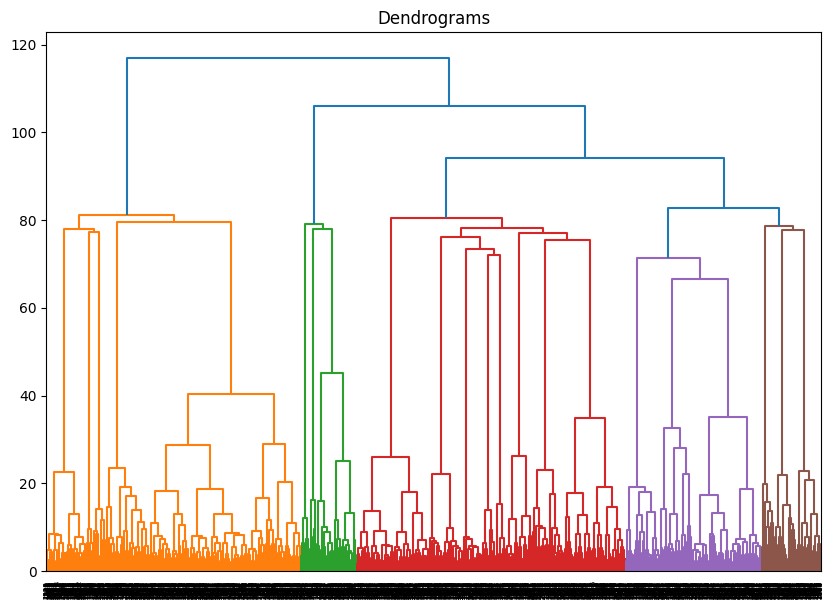

In [24]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = hierarchy.dendrogram(hierarchy.linkage(covertype_processed, method='ward'))

Many different significant groups can be observed. 4 big ones are highlighted in particular, but a good argument can be given for much higher numbers of groups.

It can be noticed that the "optimal" amount of clusters lands at 21 to 23 for all the scores evaluated.

As opposed to what experts in the field suggest (there being 7 classes in the data set), we can observe that the optimal amount of clusters as suggested by the scores evaluated is around 21 to 23, with all of them reaching their absolute best score at 23. Taking this into account, the amount of clusters to be used in the definitive model shall be 23.


In [25]:
calculated_n_clusters = 23

## 2D data visualization

### PCA

To reduce the dimensions of the data and make it possible to visualize it in a 2D plane, PCA (Principal Component Analysis) is applied.

Through this, the top 2 components with the highest variance are extracted. This way, while some information is lost, a 2D plot can be constructed.

In [26]:
pca = PCA(n_components=2, random_state=0)
pca.fit(covertype_processed)
covertype_pca = pca.transform(covertype_processed)

In [27]:
print("Variance of each column:", pca.explained_variance_ratio_)
print("Total:", pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])

Variance of each column: [0.10161762 0.07935887]
Total: 0.18097649071784316


It can be seen that, due to the structure of the data, the first two components barely manage to capture 17% of the total variance. In other words, most information is being lost.

This means that PCA is not an effective way to reduce the dimensions of this particular dataset.

Nonetheless, the results can be visualized in a plot.

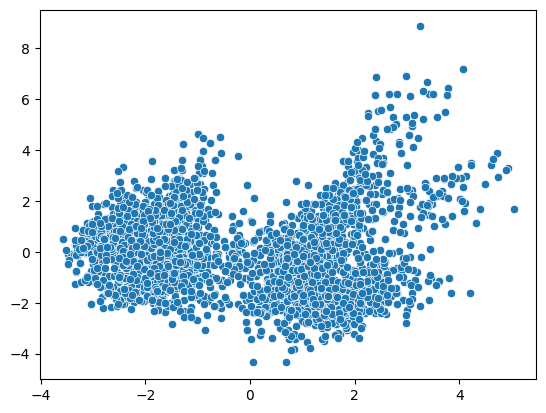

In [28]:
s = sns.scatterplot(x=covertype_pca[:, 0], y=covertype_pca[:, 1])

It can be observed that the result is one big blob of seemingly uniformly distributed samples. From this, it's hard to tell if the data forms more than one cluster, which contradicts the value previously obtained through Hopkins statistic. A different method to reduce the dimensions is required.

### T-SNE

T-SNE is another, different, way of reducing the dimensions of the data. Just like with PCA, it is applied to the covertype data, and then its results are visualized in a 2D plane.


In [29]:
def tsne_plot(X, y=None):
  X_tsne = TSNE(verbose=0, perplexity=20, n_jobs=-1, learning_rate=200.0, init="random", random_state=0).fit_transform(X)
  tsne_df = pd.DataFrame({"x":X_tsne[:,0], "y":X_tsne[:,1]})
  hue = None
  if y is not None:
    y = pd.DataFrame(y, columns=["Cluster"])
    tsne_df = pd.concat([tsne_df, y], axis=1)
    hue = "Cluster"
  l = sns.lmplot(
              data=tsne_df,
              hue=hue,
              x="x",
              y="y",
              fit_reg=False,
              legend=(y is not None)
          )
  l.set(xlabel=None, ylabel=None)
  plt.show()

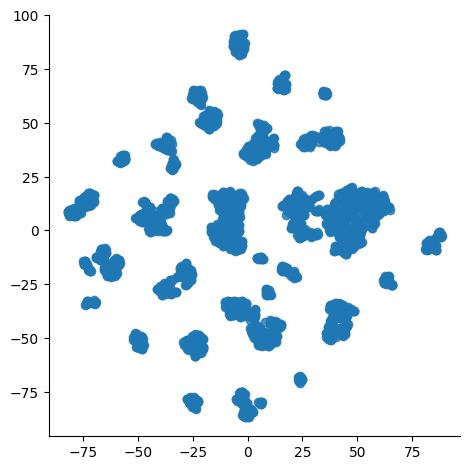

In [30]:
tsne_plot(covertype_processed)

Unlike with PCA, this time multiple clusters of data can be easily visualized, confirming the results previously obtained through Hopkins statistic and also the fact that a number of clusters close to 23 might, indeed, be optimal.

## Clustering Models

### Agglomerative Clustering - Ward

Now having both the optimal algorithm and number of clusters, we construct the model once more and analyze the resulting clusters in greater detail.

In [31]:
ac_c = AgglomerativeClustering(n_clusters=calculated_n_clusters, linkage='ward').fit(covertype_processed)

In [32]:
ac_c_sil, ac_c_chs, ac_c_dbs = report(covertype_processed, ac_c.labels_)

Silhouette Coefficient: 0.42393766199505306
Calinski Harabasz Score: 378.8863336274829
Davies Bouldin Score: 0.8957386866983476


With the cluster labels, we can get a more visual idea of how they are distributed via T-SNE.

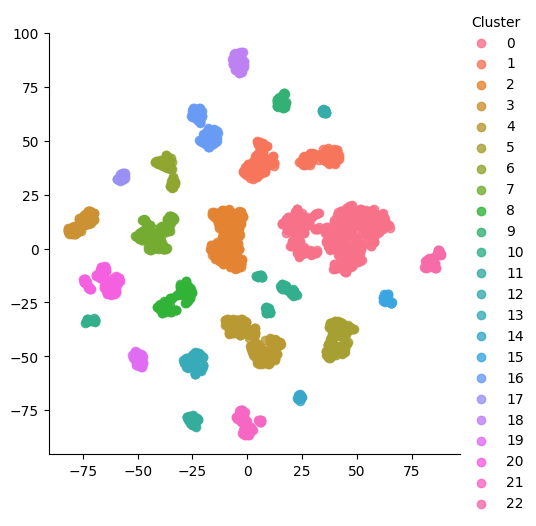

In [33]:
tsne_plot(covertype_processed, ac_c.labels_)

We can also see how many instances each cluster possesses.

In [34]:
covertype_clusters = covertype_processed
covertype_clusters = pd.DataFrame(covertype_clusters, columns=column_labels[:-1])
covertype_clusters.insert(54, "Cluster", ac_c.labels_, True)
value_counts = covertype_clusters["Cluster"].value_counts()
value_counts

0     522
2     251
1     243
4     215
7     154
5     142
20    119
16    115
8     109
10    108
3      90
6      81
21     81
13     78
18     66
22     60
19     51
9      46
11     42
15     34
17     32
14     23
12     21
Name: Cluster, dtype: int64

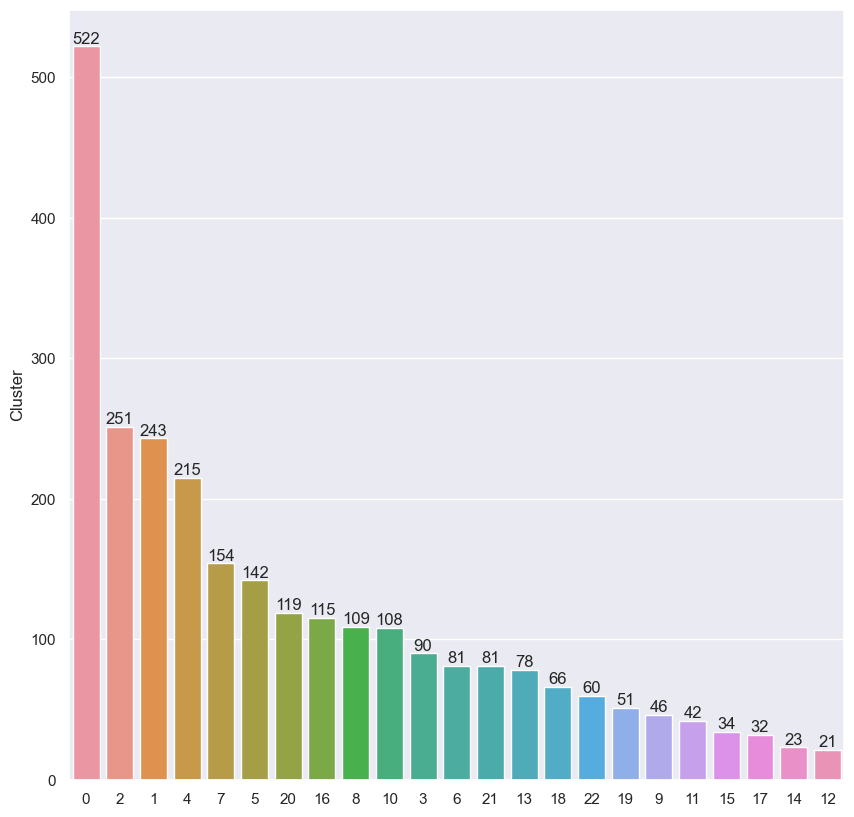

In [35]:
sns.set(rc={'figure.figsize':(10, 10)})
ax = sns.barplot(x=value_counts.index, y=value_counts, order=value_counts.index)
for i in ax.containers:
    ax.bar_label(i,)

A significant imbalance can be found in the number of instances in each cluster, with the majority having over 20 times the minority.

## Characterization of the clusters

### Cluster reduction via two-step clustering.

While the results obtained are good, one issue remains: for this whole experiment to be of any use, we must find what makes each characterizes each cluster. Having 23 different clusters, this would prove difficult.

Taking into account the fact that there's some clusters with very few amounts of instances, in hopes of reducing the amount of clusters we have to work with, we cluster the clusters (two-step clustering). We do this by calculating the centroid of each feature for each cluster and then pass it though a clustering model.

We calculate the centroids.

In [36]:
nc = NearestCentroid().fit(covertype_processed, ac_c.labels_)
sc_two = StandardScaler()
centroids = sc_two.fit_transform(nc.centroids_)
centroids

array([[ 0.32465065, -0.62005369, -0.25785479, ..., -0.21320072,
        -0.21320072, -0.21320072],
       [ 0.45674657, -0.08788671, -1.09004977, ..., -0.21320072,
        -0.21320072, -0.21320072],
       [ 0.68692869,  0.67023469, -0.82480834, ..., -0.21320072,
        -0.21320072, -0.21320072],
       ...,
       [ 0.73303974,  0.11870591, -0.58902042, ..., -0.21320072,
        -0.21320072, -0.21320072],
       [ 1.39360199,  1.31601974, -0.81524395, ...,  4.69041576,
        -0.21320072, -0.21320072],
       [-0.68422226, -0.48582515,  0.48762081, ..., -0.21320072,
        -0.21320072, -0.21320072]])

In [37]:
step_two_results = []
for k in range(2, len(centroids)):
        model = AgglomerativeClustering(n_clusters=k, linkage='ward')
        clusters = model.fit(centroids)
        sil = silhouette_score(centroids, clusters.labels_)
        chs = calinski_harabasz_score(centroids, clusters.labels_)
        dbs = davies_bouldin_score(centroids, clusters.labels_)
        step_two_results.append([k, sil, chs, dbs])
step_two_results_df = pd.DataFrame(data=step_two_results, columns=["n_clusters", "Silhouette Coefficient", "Calinski Harabasz Score", "Davies Bouldin Score"])
step_two_results_df

,n_clusters,Silhouette Coefficient,Calinski Harabasz Score,Davies Bouldin Score
0,2,0.062990,2.596228,2.369501
1,3,0.073612,2.542909,2.075378
2,4,0.072092,2.462930,1.996378
3,5,0.069448,2.345223,1.721909
4,6,0.054616,2.280668,1.711006
5,7,0.055844,2.194989,1.511546
6,8,0.052015,2.083987,1.458788
7,9,0.042408,2.005491,1.444797
8,10,0.044659,1.944356,1.369431
9,11,0.036609,1.902758,1.234043


In [38]:
hopkins(pd.DataFrame(nc.centroids_))

0.7690059901614631

### Silhouette Coefficient
Higher is better

<Axes: xlabel='n_clusters', ylabel='Silhouette Coefficient'>

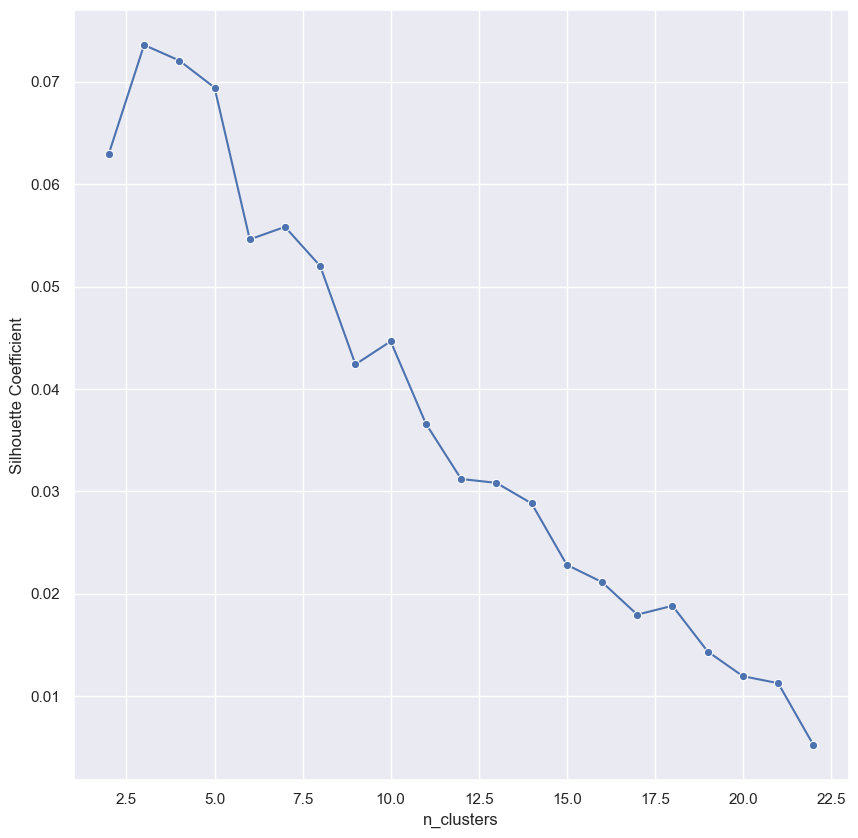

In [39]:
sns.lineplot(data=step_two_results_df, x="n_clusters", y="Silhouette Coefficient", marker='o')

Reaches a plateau at n_clusters = 3.

### Calinski Harabasz Score
Higher is better

<Axes: xlabel='n_clusters', ylabel='Calinski Harabasz Score'>

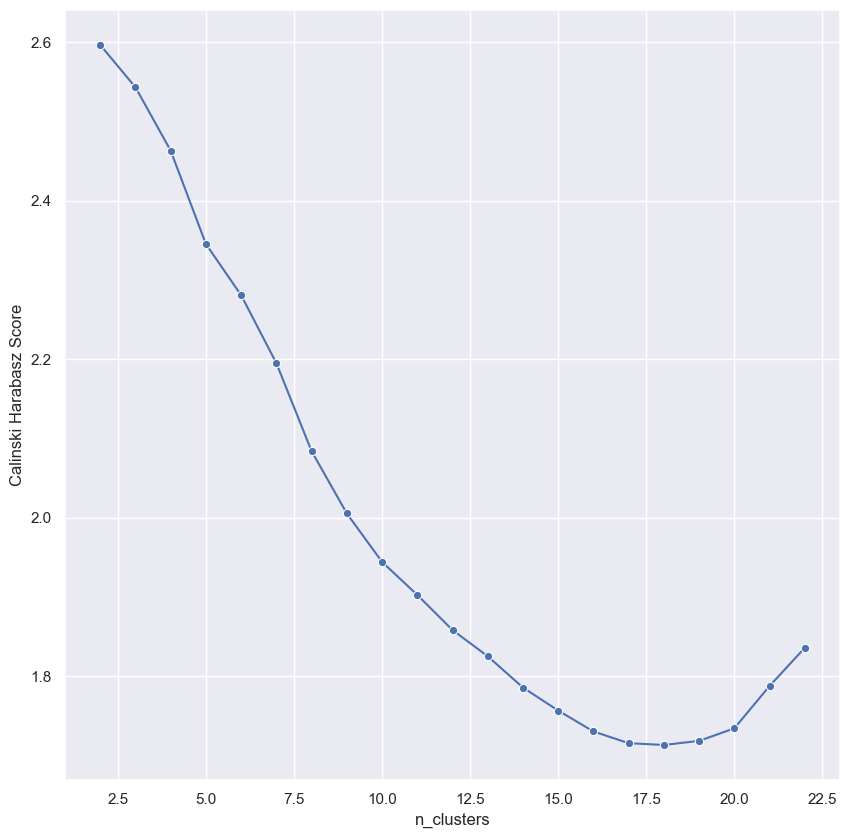

In [40]:
sns.lineplot(data=step_two_results_df, x="n_clusters", y="Calinski Harabasz Score", marker='o')

Has its peak at n_clusters = 2.

### Davies Bouldin Score
Lower is better

<Axes: xlabel='n_clusters', ylabel='Davies Bouldin Score'>

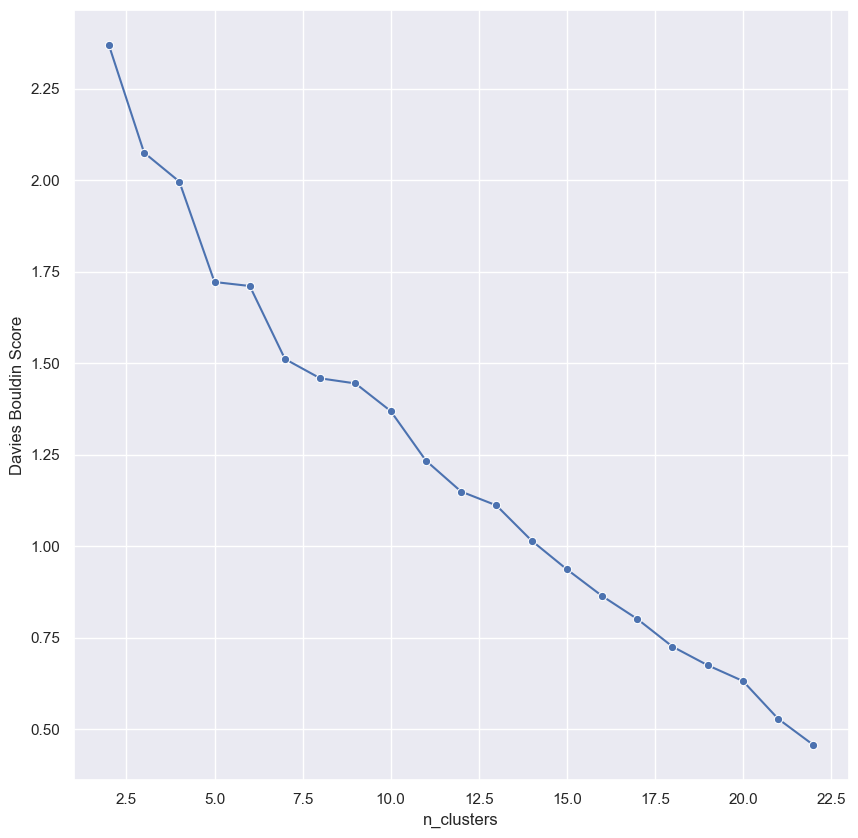

In [41]:
sns.lineplot(data=step_two_results_df, x="n_clusters", y="Davies Bouldin Score", marker='o')

Improves all the way down to n_clusters = 22. However, its first elbow forms at n_clusters = 3.

From this, n_clusters = 3 shall be selected.

In [42]:
step_two_n_clusters = 3

In [43]:
two_ac_c = AgglomerativeClustering(n_clusters=step_two_n_clusters, linkage='ward').fit(centroids)
two_ac_c_sil, two_ac_c_chs, two_ac_c_dbs = report(centroids, two_ac_c.labels_)

Silhouette Coefficient: 0.07361235305232434
Calinski Harabasz Score: 2.5429089388911272
Davies Bouldin Score: 2.075378454806458


In [44]:
two_ac_c.labels_

array([1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0,
       0], dtype=int64)

We must now pass these new clusters on to the full dataset.

In [45]:
covertype_clusters["Step-Two Clusters"] = two_ac_c.labels_[covertype_clusters["Cluster"]]
covertype_clusters

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area0,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Soil_Type0,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Cluster,Step-Two Clusters
0,-0.713480,-0.812271,0.374488,-0.274635,-0.489443,-0.732502,0.799685,-0.931741,-1.160682,0.205853,-0.881339,-0.238218,1.106503,-0.251642,-0.074419,-0.116653,-0.085332,-0.145223,-0.041523,-0.105538,0.0,-0.018557,-0.058773,-0.228375,-0.160552,-0.227539,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,-0.338094,-0.207576,-0.026248,-0.078961,-0.037133,-0.045494,-0.475664,-0.239828,4.735760,-0.322061,-0.298729,-0.05255,-0.072044,-0.018557,-0.026248,-0.16936,-0.172559,-0.126845,16,0
1,-2.164636,-0.821224,-0.960999,-0.669915,-0.438230,-0.613023,0.534055,0.155191,-0.182175,-1.252691,-0.881339,-0.238218,-0.903748,3.973903,-0.074419,-0.116653,-0.085332,-0.145223,-0.041523,9.475297,0.0,-0.018557,-0.058773,-0.228375,-0.160552,-0.227539,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,-0.338094,-0.207576,-0.026248,-0.078961,-0.037133,-0.045494,-0.475664,-0.239828,-0.211159,-0.322061,-0.298729,-0.05255,-0.072044,-0.018557,-0.026248,-0.16936,-0.172559,-0.126845,17,2
2,0.099452,-1.000274,-1.361645,0.082546,-0.284593,1.781660,0.306372,0.402221,0.126827,2.841453,1.134637,-0.238218,-0.903748,-0.251642,-0.074419,-0.116653,-0.085332,-0.145223,-0.041523,-0.105538,0.0,-0.018557,-0.058773,-0.228375,-0.160552,4.394848,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,-0.338094,-0.207576,-0.026248,-0.078961,-0.037133,-0.045494,-0.475664,-0.239828,-0.211159,-0.322061,-0.298729,-0.05255,-0.072044,-0.018557,-0.026248,-0.16936,-0.172559,-0.126845,5,1
3,-2.022016,-0.454171,1.709976,-0.560379,0.278746,-1.274309,1.520681,-1.326988,-2.319440,-0.892632,-0.881339,-0.238218,1.106503,-0.251642,-0.074419,-0.116653,-0.085332,6.885976,-0.041523,-0.105538,0.0,-0.018557,-0.058773,-0.228375,-0.160552,-0.227539,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,-0.338094,-0.207576,-0.026248,-0.078961,-0.037133,-0.045494,-0.475664,-0.239828,-0.211159,-0.322061,-0.298729,-0.05255,-0.072044,-0.018557,-0.026248,-0.16936,-0.172559,-0.126845,19,0
4,-1.109250,-1.224086,-0.693902,0.263518,0.449454,-0.801506,0.040743,-0.091839,0.049577,-0.720994,1.134637,-0.238218,-0.903748,-0.251642,-0.074419,-0.116653,-0.085332,-0.145223,-0.041523,-0.105538,0.0,-0.018557,-0.058773,-0.228375,-0.160552,4.394848,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,-0.338094,-0.207576,-0.026248,-0.078961,-0.037133,-0.045494,-0.475664,-0.239828,-0.211159,-0.322061,-0.298729,-0.05255,-0.072044,-0.018557,-0.026248,-0.16936,-0.172559,-0.126845,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,0.887426,0.047169,-1.495194,1.392210,-0.199238,2.265964,0.344320,0.846875,0.307079,0.387408,1.134637,-0.238218,-0.903748,-0.251642,-0.074419,-0.116653,-0.085332,-0.145223,-0.041523,-0.105538,0.0,-0.018557,-0.058773,-0.228375,-0.160552,-0.227539,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,-0.338094,-0.207576,-0.026248,-0

With this, we can repeat the previous visualizations built.
First, the distribution of the clusters over a 2D plane.

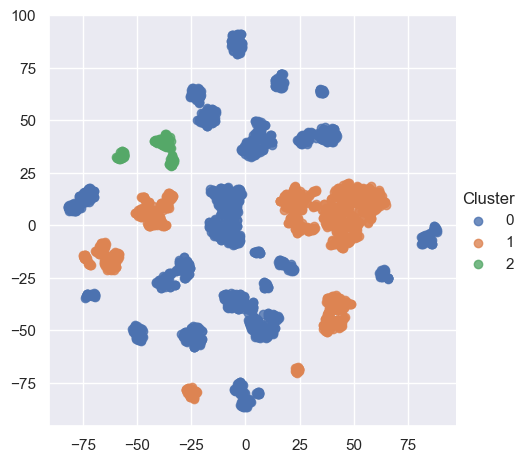

In [46]:
tsne_plot(covertype_processed, covertype_clusters["Step-Two Clusters"].to_numpy())

It can be observed that the clusters are joined together. Taking this into account and the already low metrics, we look into the Silhouette score of each cluster into more detail.

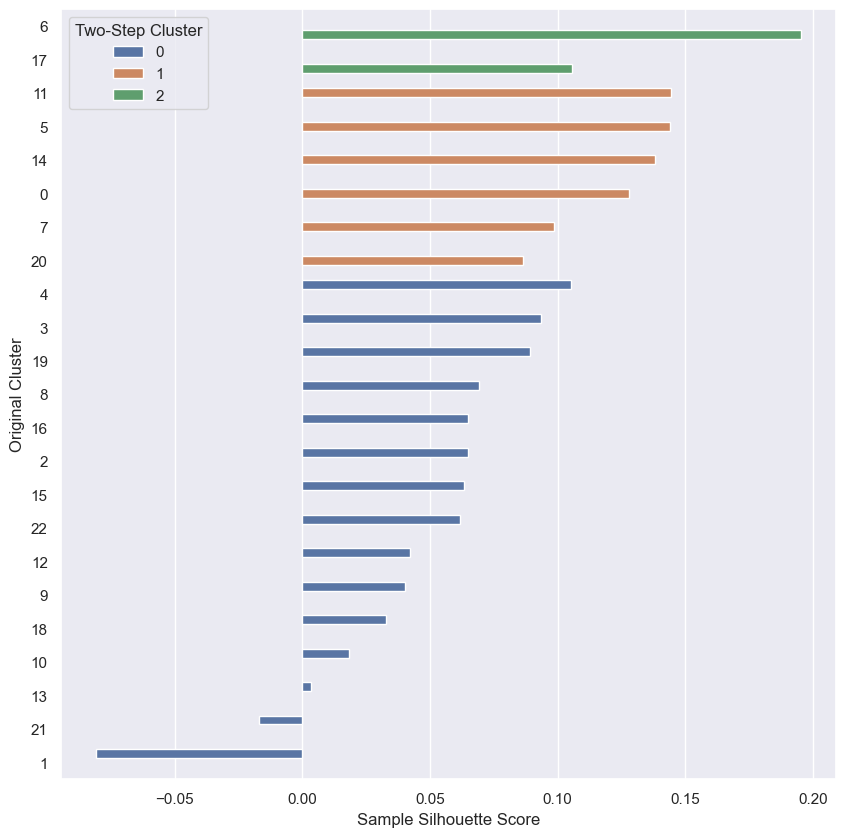

In [47]:
centroids_clusters = pd.DataFrame(two_ac_c.labels_, columns=["Two-Step Cluster"])
silhouette_scores_samples = silhouette_samples(centroids, two_ac_c.labels_)
centroids_clusters.insert(1, "Sample Silhouette Score", silhouette_scores_samples, True)
ordered_centroids_clusters = centroids_clusters.sort_values(by=["Two-Step Cluster", "Sample Silhouette Score"], ascending=False)
ordered_centroids_clusters
ax = sns.barplot(data=ordered_centroids_clusters, x="Sample Silhouette Score", y=ordered_centroids_clusters.index, hue="Two-Step Cluster", orient="h", order=ordered_centroids_clusters.index)
ax.set(ylabel='Original Cluster')
plt.show()

From this, it can be seen that cluster 1, contained in the step-two cluster 0, has probably been assigned wrongly and is an outlier.

Because of this, we change the cluster 1 of the original 23 forming a new cluster with the number 3, isolating the outlier.

In [48]:
covertype_clusters.loc[(covertype_clusters['Cluster'] == 1), 'Step-Two Clusters'] = 3

covertype_clusters.loc[covertype_clusters['Cluster'] == 1]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area0,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Soil_Type0,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Cluster,Step-Two Clusters
20,-0.160829,-1.170371,0.240939,-0.465131,-0.694293,1.541425,-0.073099,-0.931741,-0.413926,1.141853,1.134637,-0.238218,-0.903748,-0.251642,-0.074419,-0.116653,-0.085332,-0.145223,-0.041523,-0.105538,0.0,-0.018557,-0.058773,-0.228375,-0.160552,-0.227539,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,2.957756,-0.207576,-0.026248,-0.078961,-0.037133,-0.045494,-0.475664,-0.239828,-0.211159,-0.322061,-0.298729,-0.05255,-0.072044,-0.018557,-0.026248,-0.16936,-0.172559,-0.126845,1,3
35,-0.645736,-0.695888,0.240939,-1.131869,-0.660152,-0.246920,1.027368,-0.684711,-1.186432,0.564386,1.134637,-0.238218,-0.903748,-0.251642,-0.074419,-0.116653,-0.085332,-0.145223,-0.041523,-0.105538,0.0,-0.018557,-0.058773,-0.228375,-0.160552,-0.227539,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,2.957756,-0.207576,-0.026248,-0.078961,-0.037133,-0.045494,-0.475664,-0.239828,-0.211159,-0.322061,-0.298729,-0.05255,-0.072044,-0.018557,-0.026248,-0.16936,-0.172559,-0.126845,1,3
47,-0.100216,-0.695888,-1.228097,0.744522,-0.608939,-0.844313,0.496108,0.402221,-0.053424,0.138723,1.134637,-0.238218,-0.903748,-0.251642,-0.074419,-0.116653,-0.085332,-0.145223,-0.041523,-0.105538,0.0,-0.018557,-0.058773,-0.228375,-0.160552,-0.227539,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,2.957756,-0.207576,-0.026248,-0.078961,-0.037133,-0.045494,-0.475664,-0.239828,-0.211159,-0.322061,-0.298729,-0.05255,-0.072044,-0.018557,-0.026248,-0.16936,-0.172559,-0.126845,1,3
66,0.220679,1.022992,-0.426804,-0.274635,-0.882073,0.191381,-0.794094,1.044498,1.285586,-0.446373,-0.881339,-0.238218,1.106503,-0.251642,-0.074419,-0.116653,-0.085332,-0.145223,-0.041523,-0.105538,0.0,-0.018557,-0.058773,-0.228375,-0.160552,-0.227539,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,2.957756,-0.207576,-0.026248,-0.078961,-0.037133,-0.045494,-0.475664,-0.239828,-0.211159,-0.322061,-0.298729,-0.05255,-0.072044,-0.018557,-0.026248,-0.16936,-0.172559,-0.126845,1,3
72,0.694889,-0.301978,-0.159707,1.530320,-1.547836,-1.226389,1.103262,0.352815,-0.697179,-0.023761,-0.881339,-0.238218,1.106503,-0.251642,-0.074419,-0.116653,-0.085332,-0.145223,-0.041523,-0.105538,0.0,-0.018557,-0.058773,-0.228375,-0.160552,-0.227539,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,2.957756,-0.207576,-0.026248,-0.078961,-0.037133,-0.045494,-0.475664,-0.239828,-0.211159,-0.322061,-0.298729,-0.05255,-0.072044,-0.018557,-0.026248,-0.16936,-0.172559,-0.126845,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,-0.385455,-0.686936,-0.960999,-1.131869,-0.830860,-1.358646,0.609950,0.254003,-0.207925,0.126518,1.134637,-0.238218,-0.903748,-0.251642,-0.074419,-0.116653,-0.085332,-0.145223,-0.041523,-0.105538,0.0,-0.018557,-0.058773,-0.228375,-0.160552,-0.227539,-0.180846,-0.026248,0.0,-0.067046,-0.064405,-0.058773,-0.089334,-0.121119,-0.045494,-0.230867,2.957756,-0.207576,-0.026

One more time, we look at how the clusters are distributed.

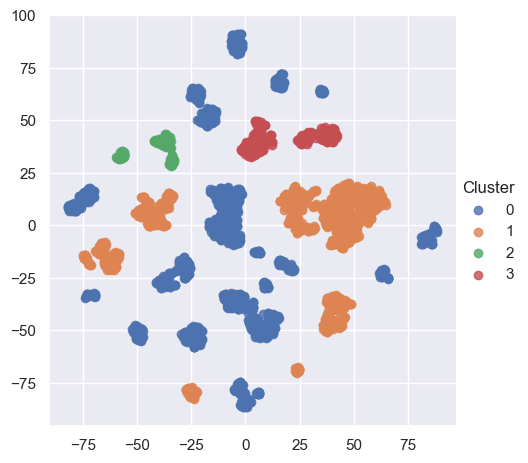

In [49]:
tsne_plot(covertype_processed, covertype_clusters["Step-Two Clusters"].to_numpy())

While clusters 2 and 3 are neatly seperated from the rest, 0 and 1 remain mixed together.

We look at how many instances each cluster has.

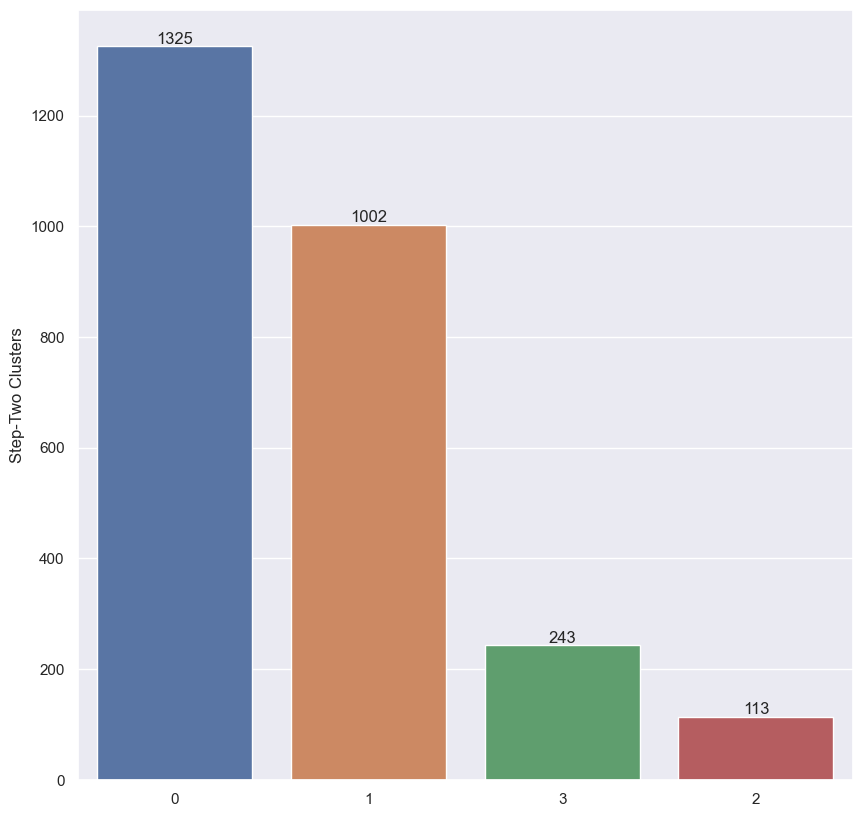

In [50]:
step_two_value_counts = covertype_clusters["Step-Two Clusters"].value_counts()
step_two_value_counts
sns.set(rc={'figure.figsize':(10, 10)})
ax = sns.barplot(x=step_two_value_counts.index, y=step_two_value_counts, order=step_two_value_counts.index)
for i in ax.containers:
    ax.bar_label(i,)

The clusters remain imbalanced, however, now the difference between the majority and the minority is of only around 10 times.

Cluster characterization - Parallels coordinates

Before going into further analysis, we must remember that the data has been standarized. So that we can return the data to their original values, we do an inverse transform. This process shall be applied to the categorical features, so that it's easier to visually figure out the tendency to have a feature or not.

In [51]:
back_cover = sc.inverse_transform(covertype_clusters.iloc[:,:54])
back_cover = pd.DataFrame(back_cover)
back_cover = back_cover.applymap(math.floor).replace(-1, 0)
back_cover.columns = column_labels[:-1]
back_cover.loc[:,["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
     "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]] = covertype_clusters.loc[:, ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
     "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]]
back_cover.loc[:,['Cluster','Step-Two Clusters']] = covertype_clusters.loc[:,['Cluster','Step-Two Clusters']]
back_cover

C:\Users\elias\AppData\Local\Temp\ipykernel_27924\3163857739.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  back_cover.loc[:,['Cluster','Step-Two Clusters']] = covertype_clusters.loc[:,['Cluster','Step-Two Clusters']]


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area0,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Soil_Type0,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Cluster,Step-Two Clusters
0,-0.713480,-0.812271,0.374488,-0.274635,-0.489443,-0.732502,0.799685,-0.931741,-1.160682,0.205853,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,0
1,-2.164636,-0.821224,-0.960999,-0.669915,-0.438230,-0.613023,0.534055,0.155191,-0.182175,-1.252691,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,2
2,0.099452,-1.000274,-1.361645,0.082546,-0.284593,1.781660,0.306372,0.402221,0.126827,2.841453,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
3,-2.022016,-0.454171,1.709976,-0.560379,0.278746,-1.274309,1.520681,-1.326988,-2.319440,-0.892632,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0
4,-1.109250,-1.224086,-0.693902,0.263518,0.449454,-0.801506,0.040743,-0.091839,0.049577,-0.720994,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,0.887426,0.047169,-1.495194,1.392210,-0.199238,2.265964,0.344320,0.846875,0.307079,0.387408,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2679,0.559401,1.354235,-0.026158,-1.131869,-0.643081,1.595734,-1.249460,0.352815,1.259836,-0.641659,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,1
2680,0.295554,-1.250944,-0.426804,1.725579,-0.216309,0.923587,-0.073099,-0.338869,-0.001924,2.041237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2681,0.309816,1.345283,-1.628743,-0.441319,-0.233380,1.021981,0.002795,0.698657,0.564581,0.525481,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


We process the data so that the parallel coordinates graph can be obtained. Since the data set contains a large amount of features, the data for the parallel coordinates graphics is segmented first.

In [52]:
ct_clusters_numeral = back_cover.iloc[:,:10]
ct_clusters_numeral.loc[:,['Step-Two Clusters']] = back_cover.loc[:,['Step-Two Clusters']]
ct_clusters_wild = back_cover.iloc[:,10:14]
ct_clusters_wild.loc[:,['Step-Two Clusters']] = back_cover.loc[:,['Step-Two Clusters']]
ct_clusters_soil_a = back_cover.iloc[:,14:24]
ct_clusters_soil_a.loc[:,['Step-Two Clusters']] = back_cover.loc[:,['Step-Two Clusters']]
ct_clusters_soil_b = back_cover.iloc[:,24:34]
ct_clusters_soil_b.loc[:,['Step-Two Clusters']] = back_cover.loc[:,['Step-Two Clusters']]
ct_clusters_soil_c = back_cover.iloc[:,34:44]
ct_clusters_soil_c.loc[:,['Step-Two Clusters']] = back_cover.loc[:,['Step-Two Clusters']]
ct_clusters_soil_d = back_cover.iloc[:,44:54]
ct_clusters_soil_d.loc[:,['Step-Two Clusters']] = back_cover.loc[:,['Step-Two Clusters']]

C:\Users\elias\AppData\Local\Temp\ipykernel_27924\556248453.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ct_clusters_numeral.loc[:,['Step-Two Clusters']] = back_cover.loc[:,['Step-Two Clusters']]
C:\Users\elias\AppData\Local\Temp\ipykernel_27924\556248453.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ct_clusters_wild.loc[:,['Step-Two Clusters']] = back_cover.loc[:,['Step-Two Clusters']]
C:\Users\elias\AppData\Local\Temp\ipykernel_27924\556248453.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attem

Parallel coordinates for the numerical data

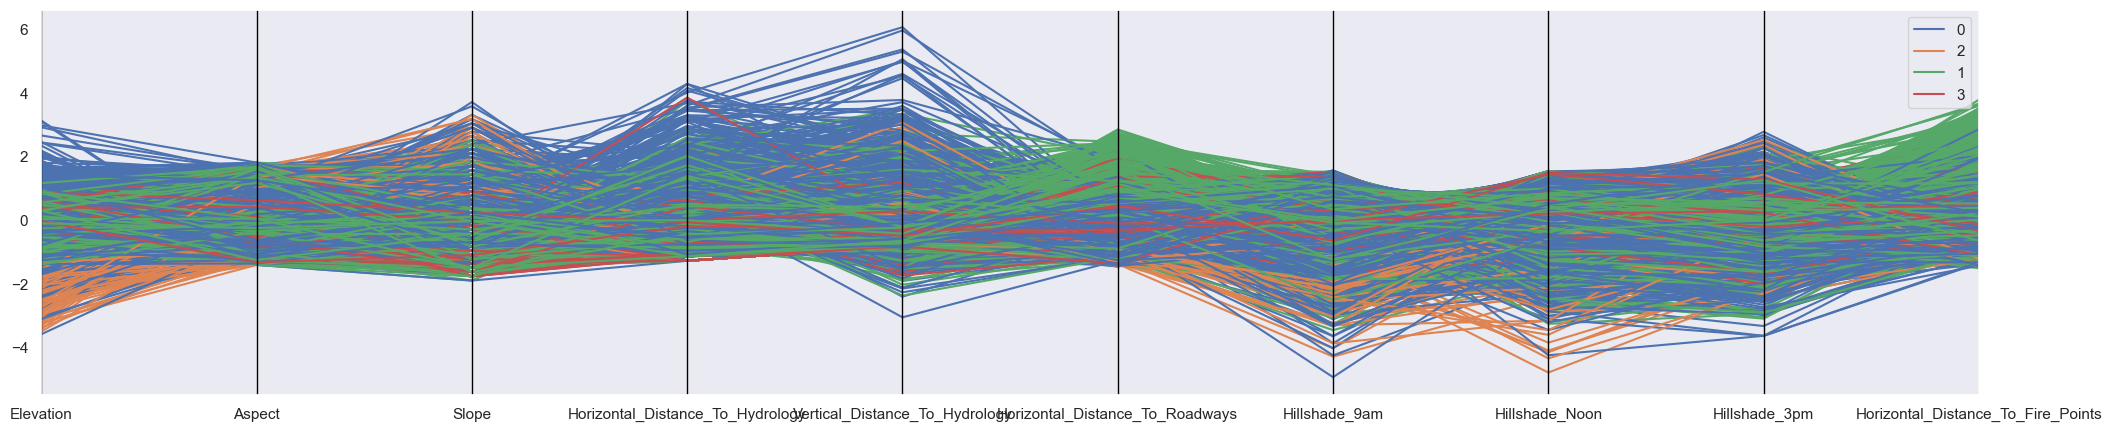

In [53]:
plt.figure(figsize=(25,5))
parallel_coordinates(ct_clusters_numeral, 'Step-Two Clusters', use_columns=False, color=sns.color_palette()[:4])
plt.show()

Parallel coordinates for Wilderness Area categories.

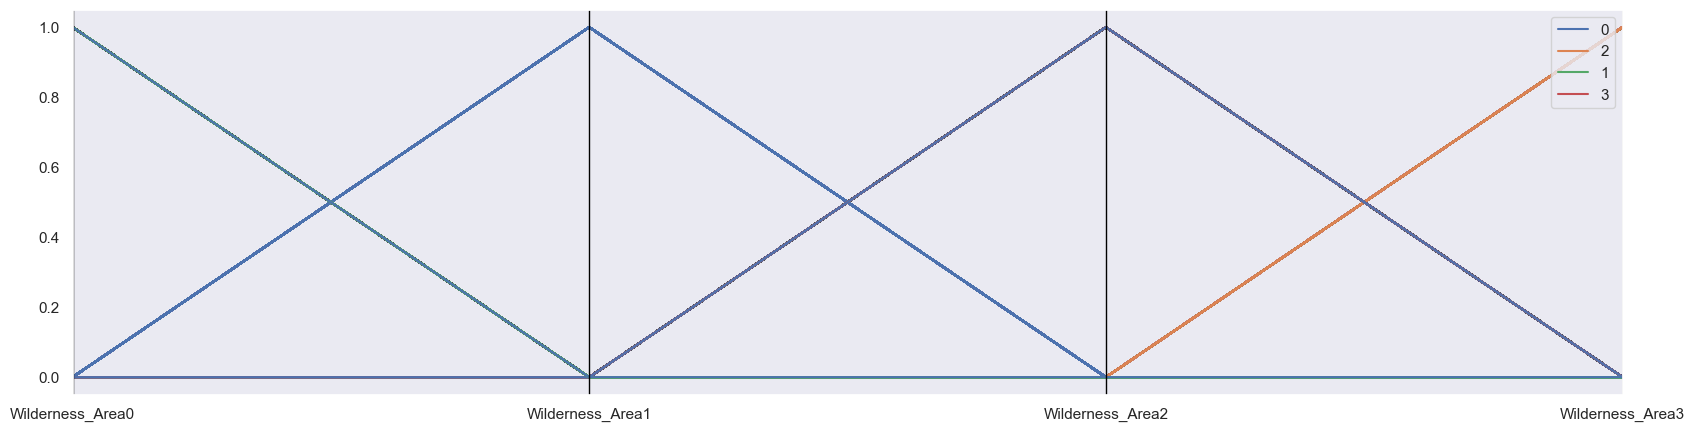

In [54]:
plt.figure(figsize=(20,5))
parallel_coordinates(ct_clusters_wild, 'Step-Two Clusters', use_columns=False, color=sns.color_palette()[:4])
plt.show()

Parallel coordinates for Soil Type categories.

<Figure size 5000x500 with 0 Axes>

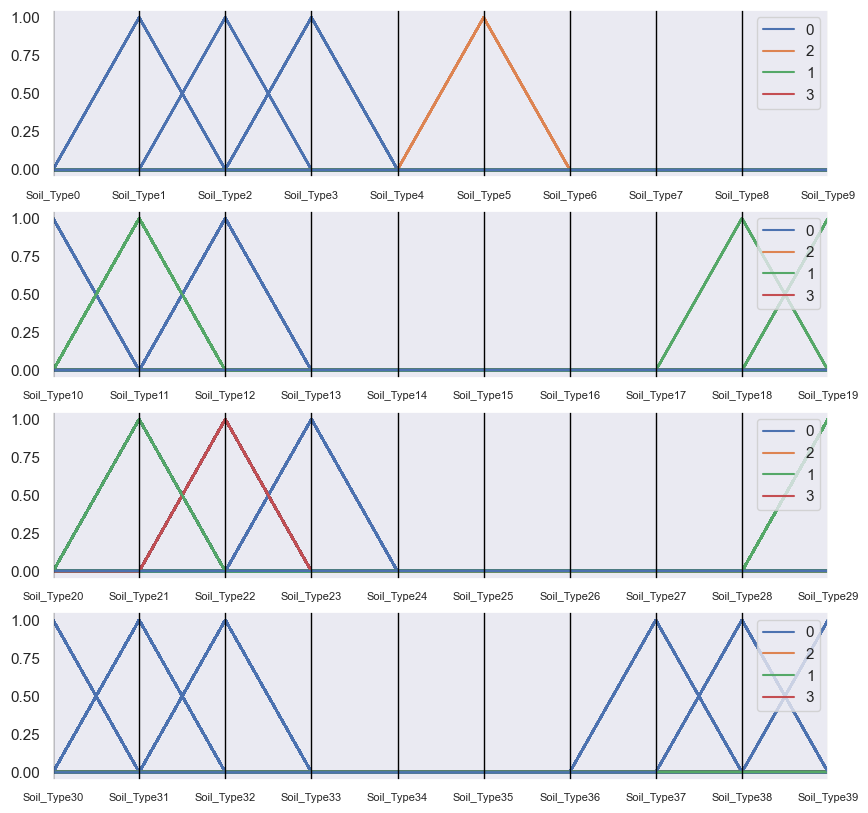

In [55]:
plt.figure(figsize=(50,5))
fig, ax = plt.subplots(nrows=4, ncols=1)
for graph in ax:
    graph.tick_params(axis="x", labelsize=8)
parallel_coordinates(ct_clusters_soil_a, 'Step-Two Clusters', use_columns=False, ax=ax[0], color=sns.color_palette()[:4])
parallel_coordinates(ct_clusters_soil_b, 'Step-Two Clusters', use_columns=False, ax=ax[1], color=sns.color_palette()[:4])
parallel_coordinates(ct_clusters_soil_c, 'Step-Two Clusters', use_columns=False, ax=ax[2], color=sns.color_palette()[:4])
parallel_coordinates(ct_clusters_soil_d, 'Step-Two Clusters', use_columns=False, ax=ax[3], color=sns.color_palette()[:4])

plt.show()

### Frequency of clusters inside each step-two cluster

<Figure size 1000x1000 with 0 Axes>

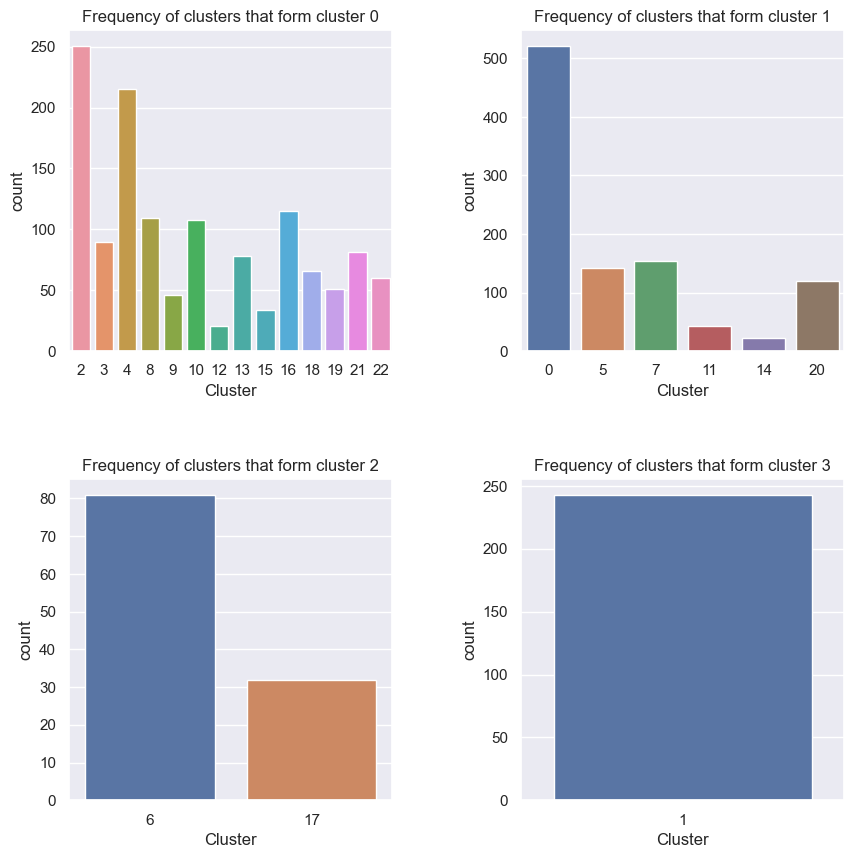

In [56]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(nrows=2, ncols=2)
step_two_cluster = 0
for row in ax:
    for col in row:
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
        cluster = back_cover.loc[back_cover['Step-Two Clusters'] == np.sort(back_cover["Step-Two Clusters"].unique())[step_two_cluster]]
        sns.countplot(x = cluster['Cluster'], ax=col)
        col.title.set_text('Frequency of clusters that form cluster ' + str(np.sort(back_cover["Step-Two Clusters"].unique())[step_two_cluster]))
        step_two_cluster += 1
plt.show()

* Cluster 0 and 1 include a large amount of different of the original clusters. It's very likely that the range of values covered by these are broad.
* On the opposite end, Cluster 2 and 3 only cover a two and one of the original clusters respectively. This means that they will probably have very well-defined ranges.

### Boxplots of numerical features for each cluster

In [57]:
import matplotlib.patheffects as path_effects
def add_median_labels(ax, fmt='.3f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

<Figure size 4000x1500 with 0 Axes>

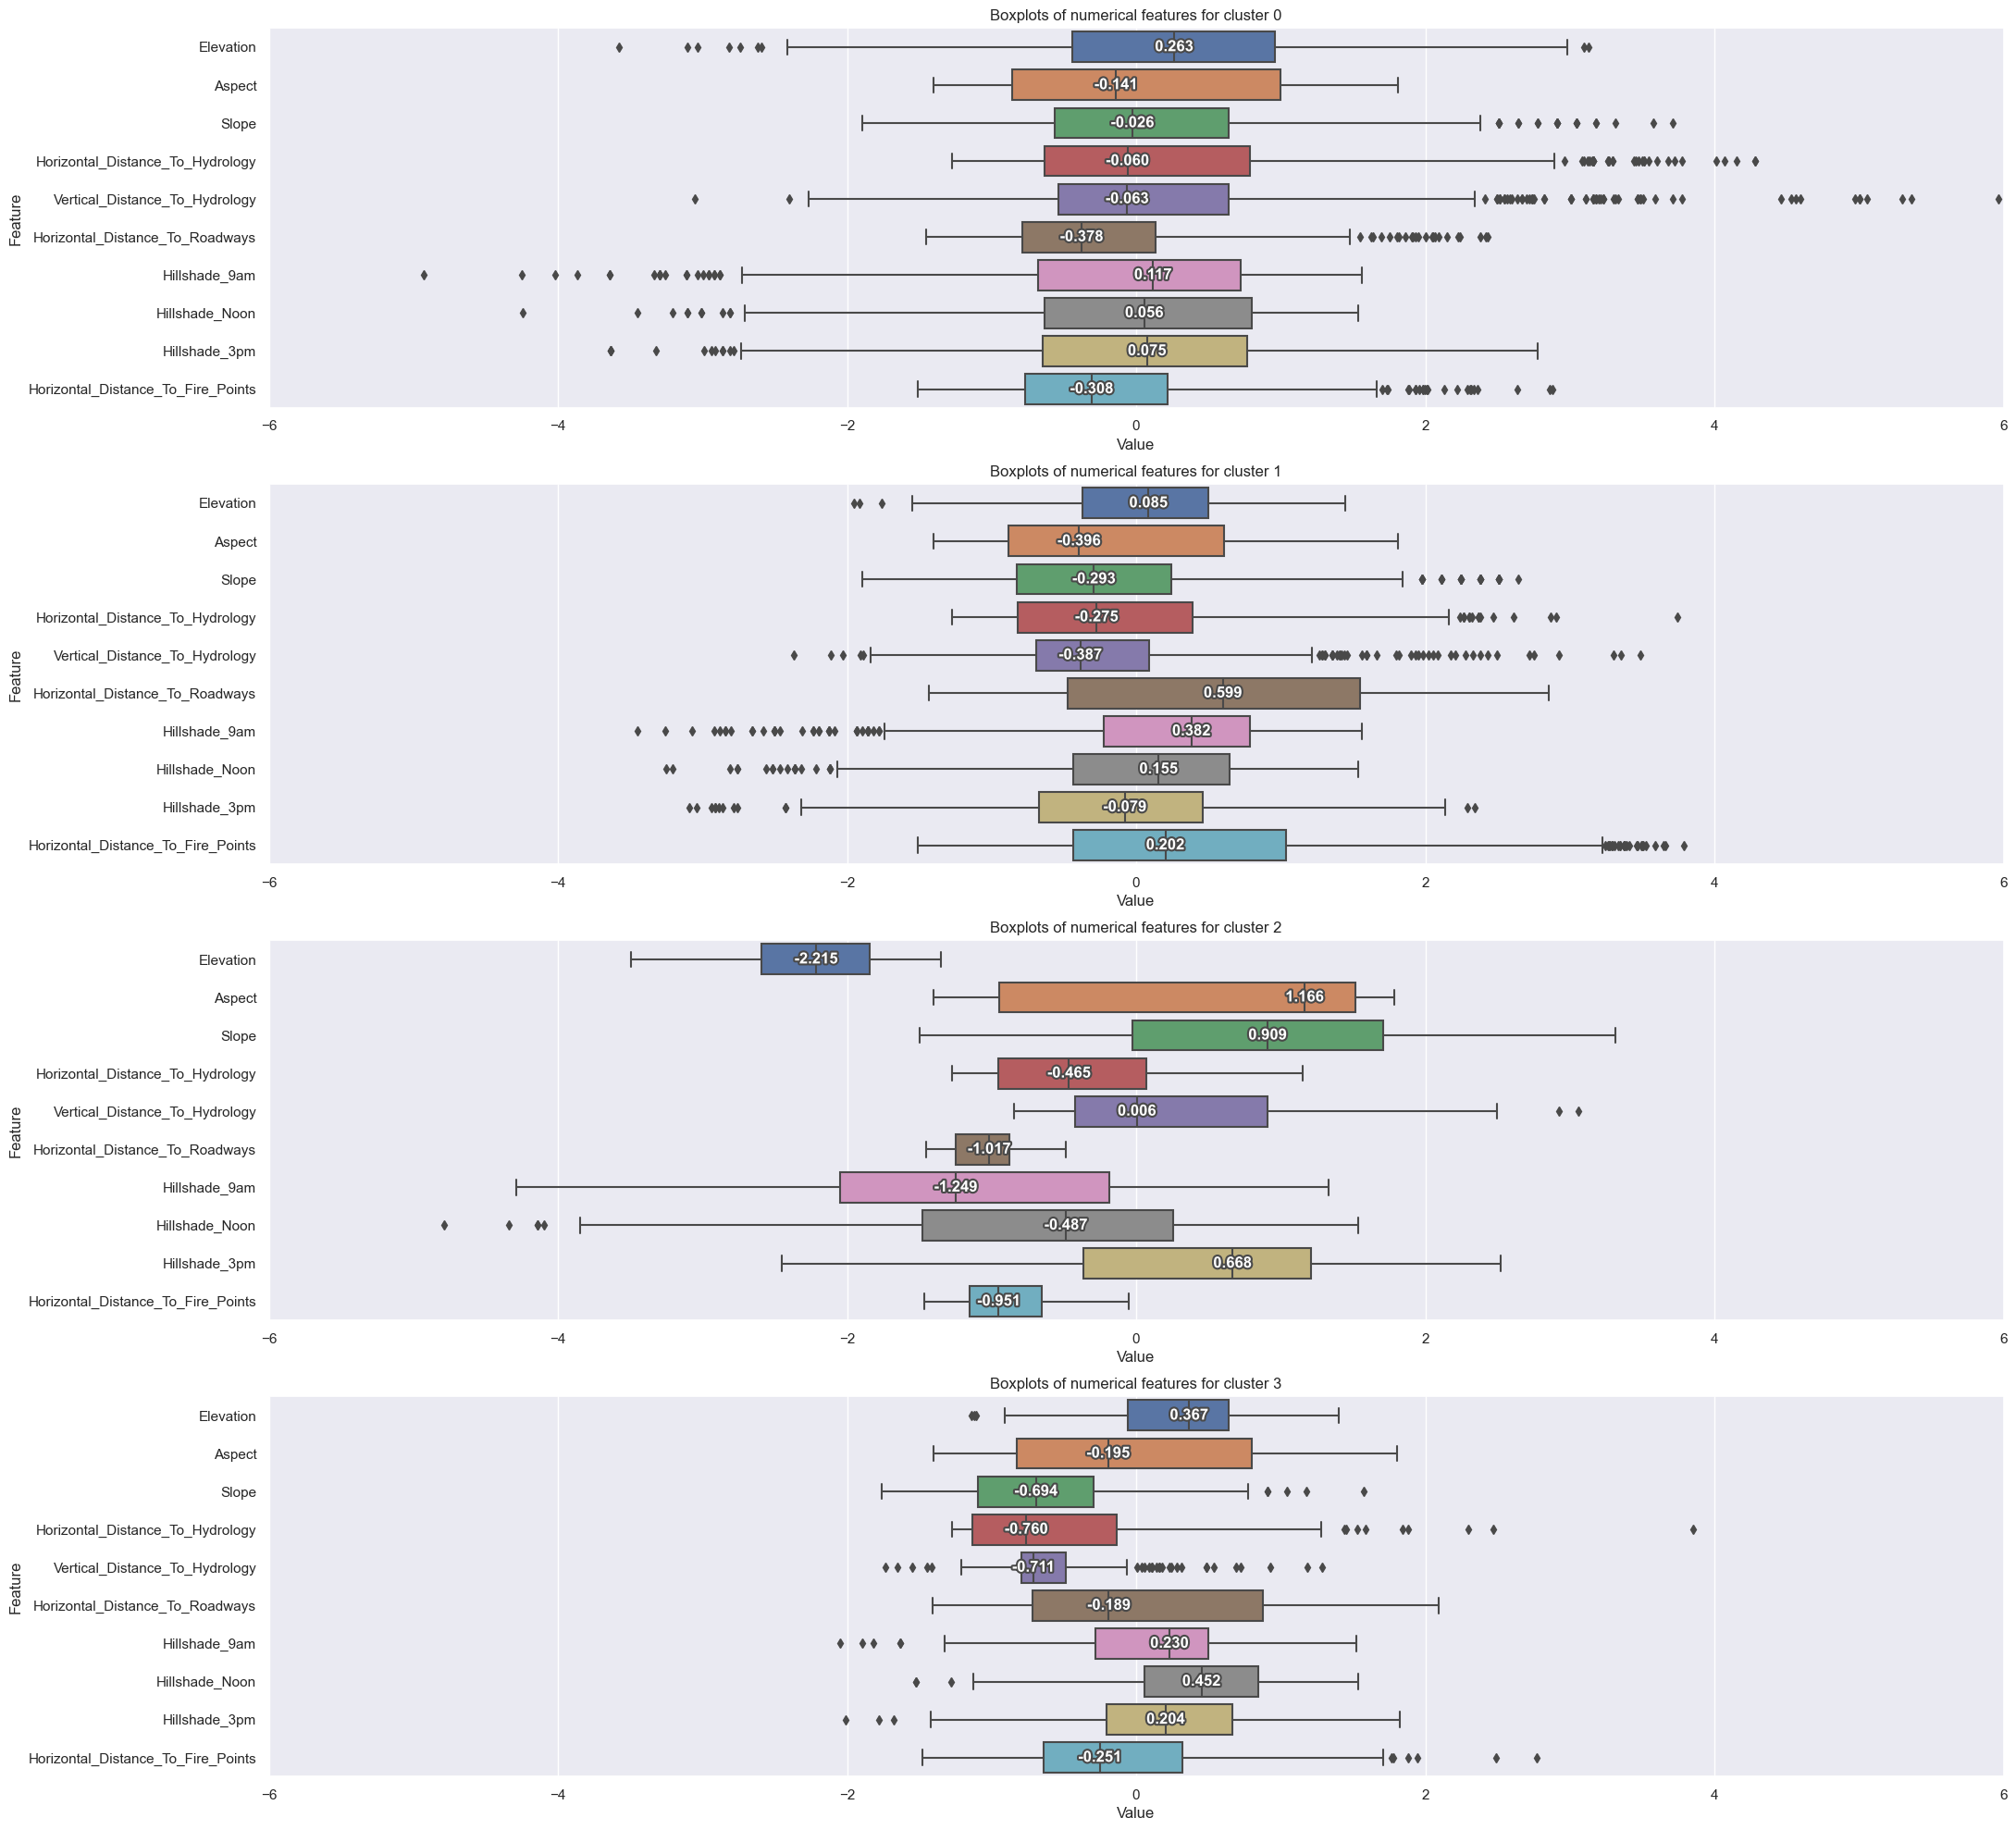

In [58]:
plt.figure(figsize=(40, 15))
fig, ax = plt.subplots(nrows=4, ncols=1)
step_two_cluster = 0
for row in ax:
    plt.subplots_adjust(top=2, right=2)
    cluster = back_cover.loc[back_cover['Step-Two Clusters'] == np.sort(back_cover["Step-Two Clusters"].unique())[step_two_cluster]]
    reduced_cluster_data = cluster.iloc[:,:10]
    melted_cluster_data = reduced_cluster_data.melt(var_name="Feature", value_name="Value")
    labels=[]
    values=[]
    box = sns.boxplot(data=melted_cluster_data, x="Value", y="Feature", ax=row)
    add_median_labels(box)
    row.set_xlim(-6, 6)
    row.title.set_text('Boxplots of numerical features for cluster ' + str(np.sort(back_cover["Step-Two Clusters"].unique())[step_two_cluster]))
    step_two_cluster += 1
plt.show()

* Cluster 0:
    * Elevation: Significantly leaning towards more elevated locations.
    * Aspect: Leaning towards lower aspects.
    * Slope: Slightly leaning towards lower slopes, but with a median very close to the mean.
    * Distance to Hydrology: Overall leaning towards being closer to sources of water.
    * Horizontal Distance To Roadways: Strongly leaning towards being close to roadways.
    * Hillshades: Leaning towards higher indexes of hillshade at all hours.
    * Horizontal Distance To Fire Points: Leans towards points prone to ignition.
    * **Conclusion**:
        * Overall large variance in all features, with plenty of outliers in most of them. Median close to the mean for most features. Likely includes all sort of places all over the park.
        * The broad ranges of the distances implies that the cluster includes data from all over the park, but with a certain leaning towards specific sectors, likely to be close to commonly human-transited areas, as suggested by the distance to roadways and distance to fire points.
* Cluster 1:
    * Elevation: Leaning towards more elevated locations.
    * Aspect: Significantly leaning towards lower aspects.
    * Slope: Significantly leaning towards lower slopes.
    * Distance to Hydrology: Overall strongly leaning towards being close to sources of water.
    * Horizontal Distance To Roadways: Strongly leaning towards being away from roadways.
    * Hillshades: Significant variation in hillshade index depending on the hour.
    * Horizontal Distance To Fire Points: Significantly leans towards places away from ignition points.
    * **Conclusion**:
        * Similar to cluster 0 large variance in all features, with plenty of outliers in most of them, but this time with much more distinct tendencies compared to the average.
        * The tendency shown towards lower aspects and slopes combined with the variance of the hillshades depending on the hour implies that the cluster leans towards locations with significant degrees of inclination, high geographical relief or both.
        * Leans towards locations away from the roads, close to water and away from ignition points. This implies being relatively distant from commonly human-transited areas.
* Cluster 2:
    * Elevation: Exclusively low elevation places.
    * Aspect: Very strongly leaning towards high aspects.
    * Slope: Very strongly leaning towards high slopes.
    * Distance to Hydrology: Leans towards being horizontally close to water. Neutral on the vertical distance.
    * Horizontal Distance To Roadways: Exclusively places close to roads.
    * Hillshades: Significant variation in hillshade index depending on the hour, with a high variance at all hours.
    * Horizontal Distance To Fire Points: Exclusively leans towards places close to ignition points.
    * **Conclusion**:
        * Well defined characteristics thanks to being a much narrower cluster.
        * Similar to cluster 1, a tendency towards places with degrees of inclination, high geographical relief or both is shown, but in the opposite direction (while cluster 1 presents negative slopes, cluster 2 presents positive ones).
        * Significantly close to roads and fire ignition points. Likely to be the cluster closest to human activity.
* Cluster 3:
    * Elevation: Leaning towards places with high elevation.
    * Aspect: Leaning towards places with lower aspect.
    * Slope: Strongly leaning towards places with lower slope.
    * Distance to Hydrology: Significantly close to water on both axis, with very low variance in the vertical one.
    * Horizontal Distance To Roadways: Leaning towards places close to the road.
    * Hillshades: Hillshade remains relatively constant at all hours.
    * Horizontal Distance To Fire Points: Significantly leaning towards places close to ignition points.
    * **Conclusion**:
        * Well defined characteristics thanks to being a much narrower cluster.
        * Behaves similar to cluster 1 in regards to slope and aspect. However, hillshade changes mostly only around Noon.
        * Likely to be mostly places closes to water.

### Frequency of a Wilderness Area for each cluster

<Figure size 4000x1500 with 0 Axes>

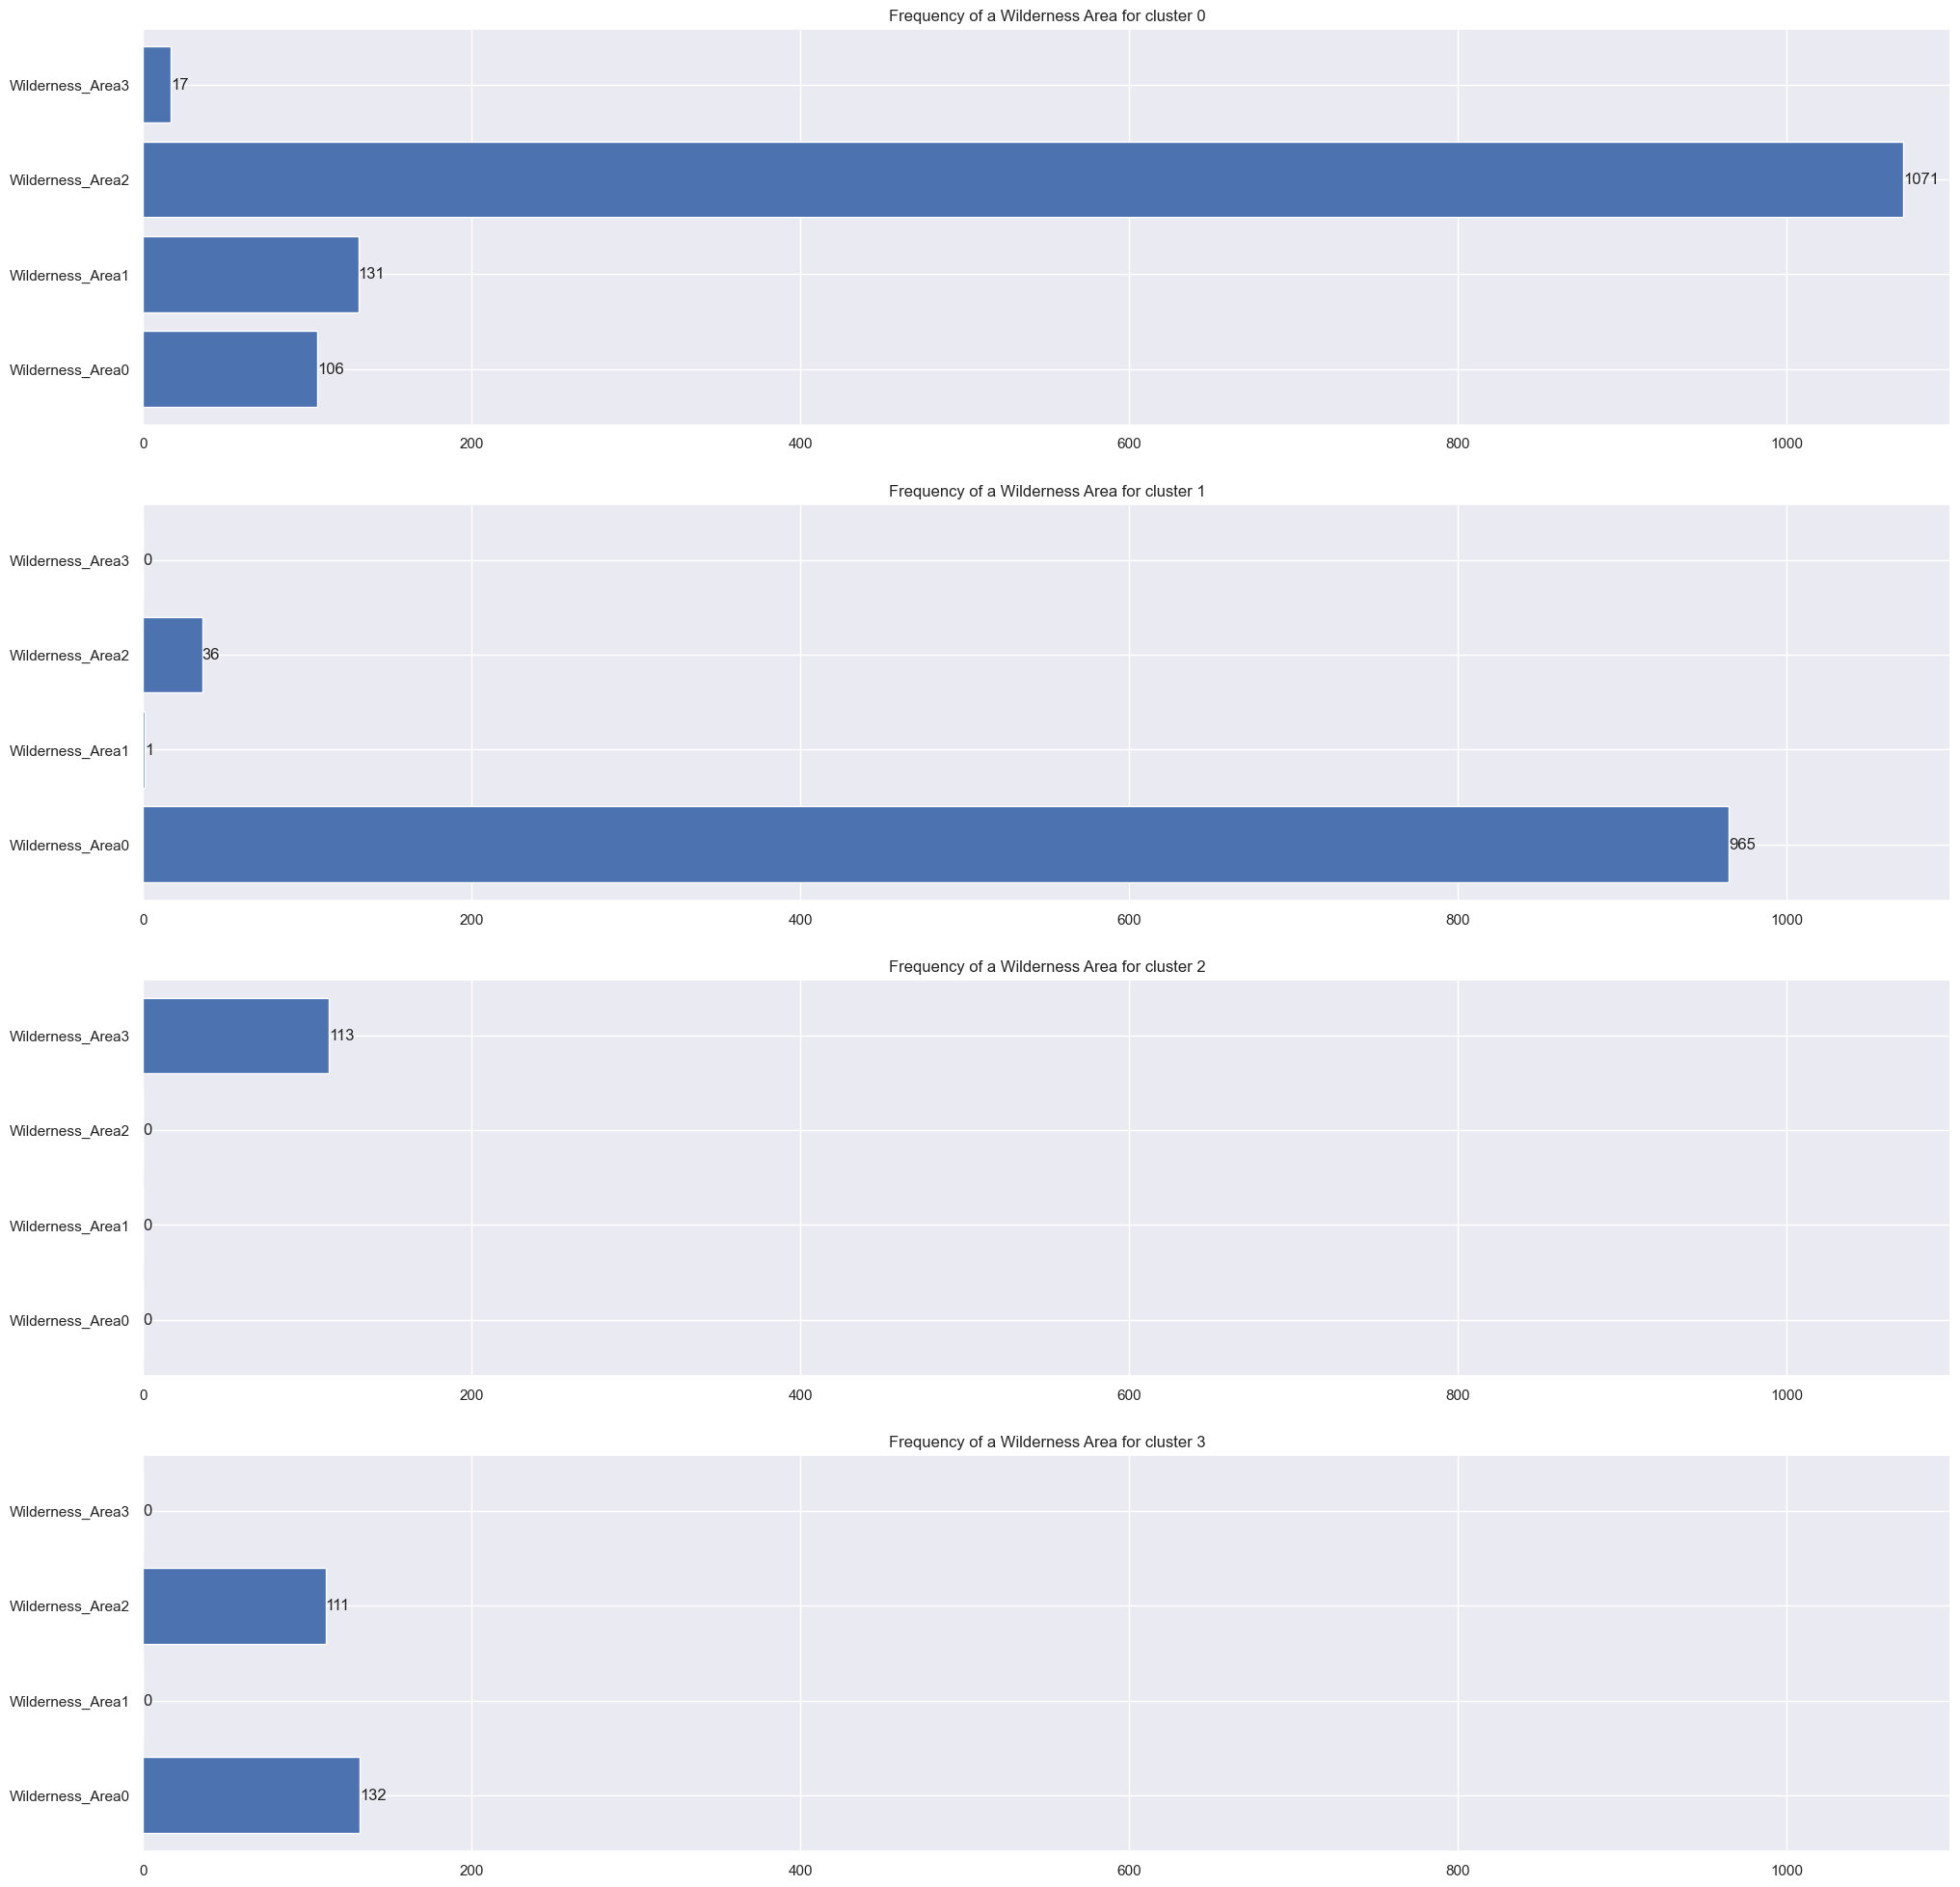

In [59]:
plt.figure(figsize=(40, 15))
fig, ax = plt.subplots(nrows=4, ncols=1)
step_two_cluster = 0
for row in ax:
    plt.subplots_adjust(top=2, right=2)
    cluster = back_cover.loc[back_cover['Step-Two Clusters'] == np.sort(back_cover["Step-Two Clusters"].unique())[step_two_cluster]]

    labels=[]
    values=[]
    for feature in cluster.iloc[:,10:14].columns:
        counter = cluster[feature].eq(1).sum()
        labels.append(feature)
        values.append(counter)

    row.barh(labels, values)
    for bars in row.containers:
            row.bar_label(bars)
    row.title.set_text('Frequency of a Wilderness Area for cluster ' + str(np.sort(back_cover["Step-Two Clusters"].unique())[step_two_cluster]))
    step_two_cluster += 1
    row.set_xlim(0, 1100)
plt.show()

* Cluster 0: Contains all types of wilderness areas. Combined with the high ranges of variance shown in the boxplots, is very likely to be the "default" or "others" cluster; the cluster for instances which don't quite fit the others. Includes the majority of the Wilderness Area 2 instances and is the only cluster to present Wilderness Area 1 instances.
* Cluster 1: Almost exclusively Area 0 instances, with some Area 2 ones. Contains the majority of the Area 0 instances.
* Cluster 2: Exclusively Area 3 instances and contains the majority of them. Confirms that the cluster corresponds to a specific area of the park.
* Cluster 3: Once again, behaves similar to cluster 1, by having only Area 2 and Area 0 instances. Fairly balanced between the two.

### Frequency of a Soil Type for each cluster

<Figure size 4000x1500 with 0 Axes>

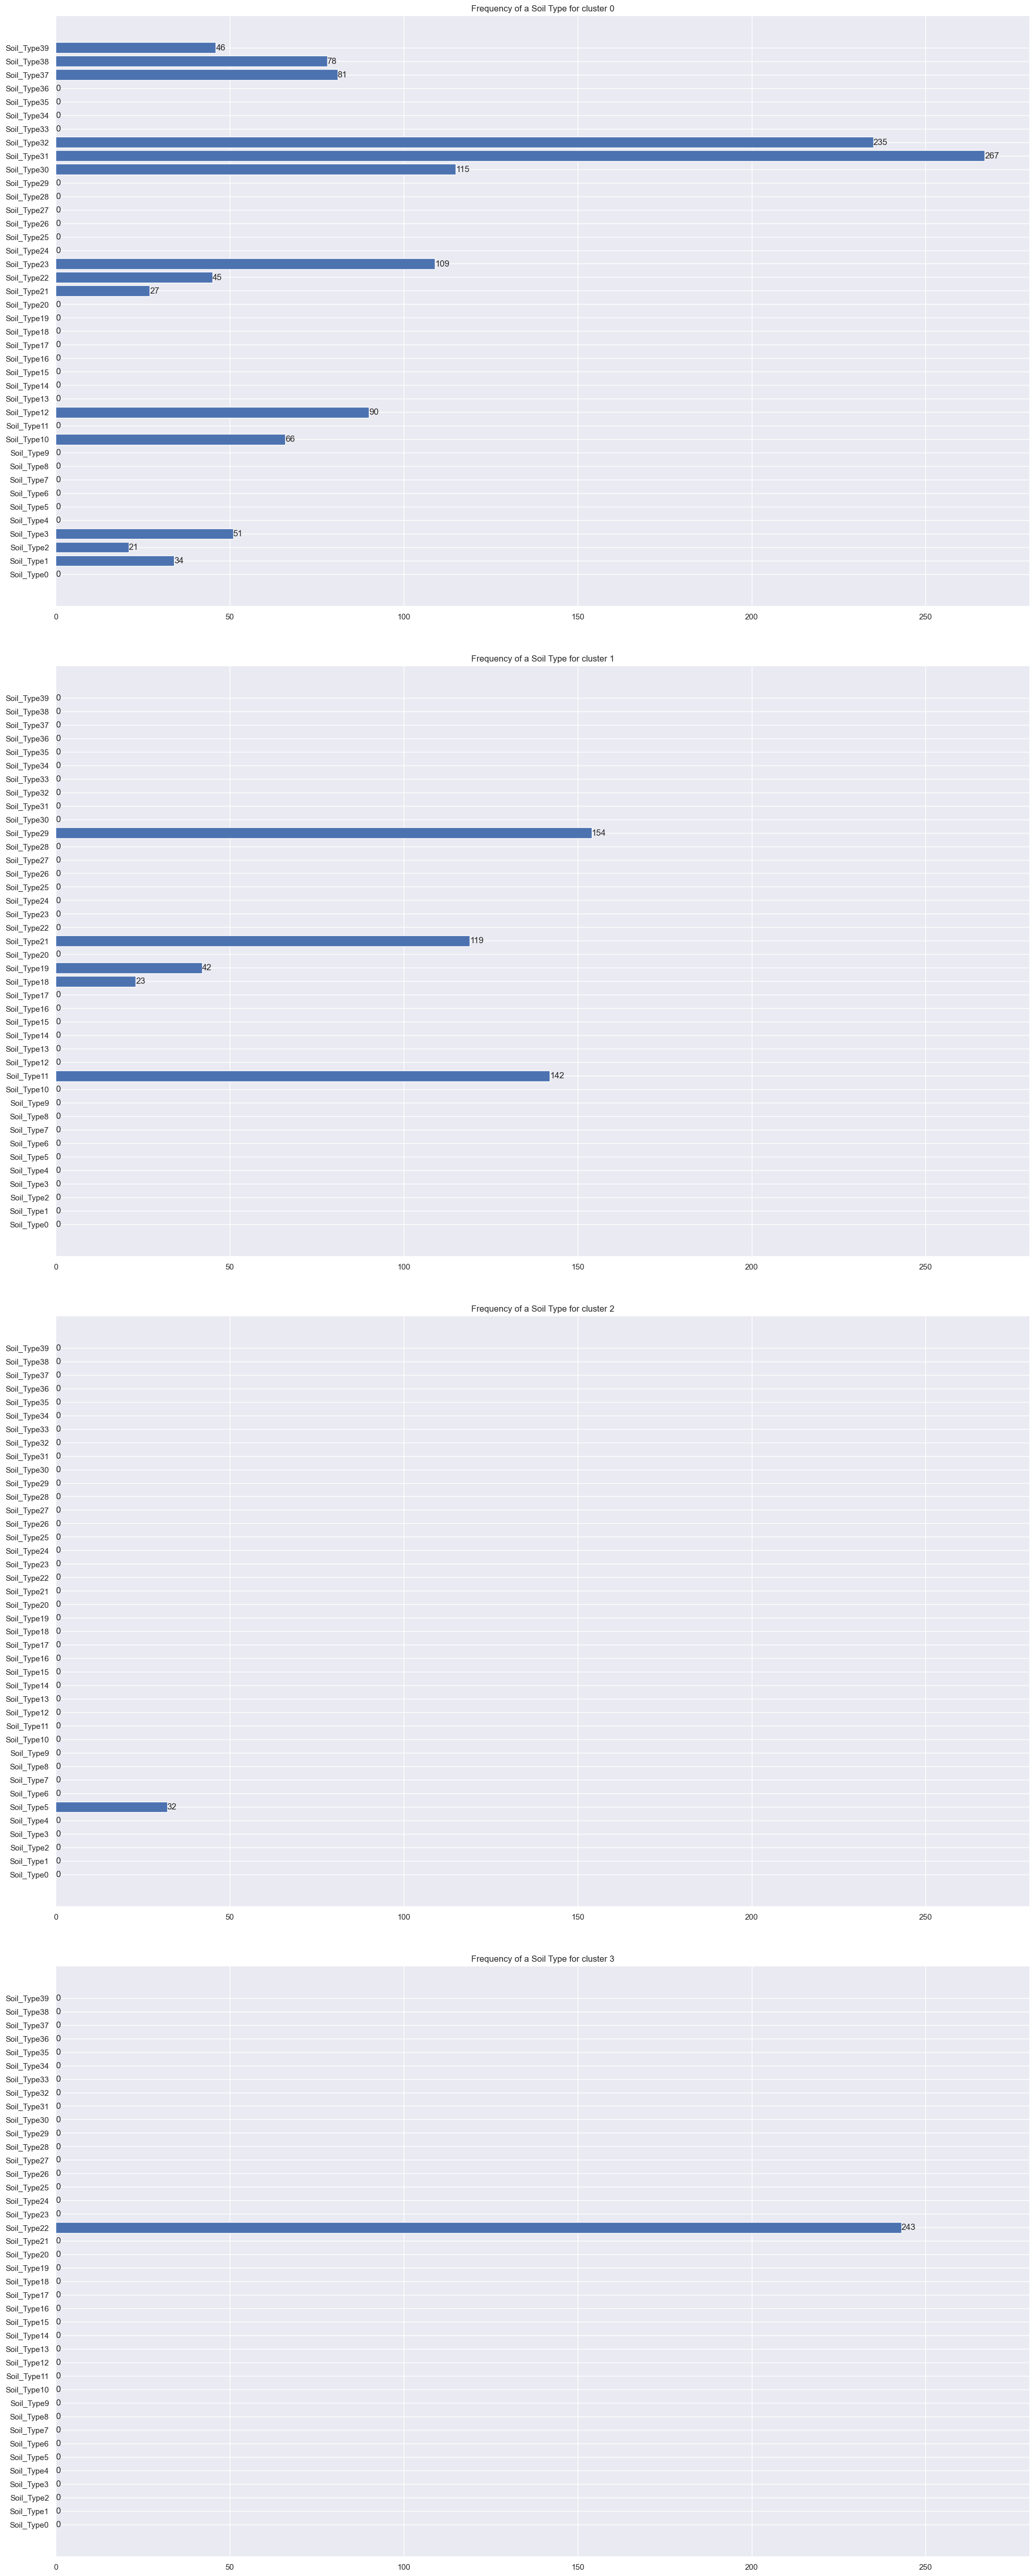

In [60]:
plt.figure(figsize=(40, 15))
fig, ax = plt.subplots(nrows=4, ncols=1)
step_two_cluster = 0
for row in ax:
    plt.subplots_adjust(top=5, right=2, hspace=0.1)
    cluster = back_cover.loc[back_cover['Step-Two Clusters'] == np.sort(back_cover["Step-Two Clusters"].unique())[step_two_cluster]]

    labels=[]
    values=[]
    for feature in cluster.iloc[:,14:54].columns:
        counter = cluster[feature].eq(1).sum()
        labels.append(feature)
        values.append(counter)

    row.barh(labels, values)
    for bars in row.containers:
            row.bar_label(bars)
    row.title.set_text('Frequency of a Soil Type for cluster ' + str(np.sort(back_cover["Step-Two Clusters"].unique())[step_two_cluster]))
    step_two_cluster += 1
    row.set_xlim(0, 280)
plt.show()

* Cluster 0: Once again, contains a large amount of the categories. Contains: 1, 2, 3, 10, 12, 21, 22, 23, 30, 31, 32, 37, 38 and 39.
* Cluster 2: Similar to 0, contains a fair amount of categories. Contains: 11, 18, 19, 21, 29.
* Cluster 2: Contains exclusively instances of type 5 or that don't belong to any of the types.
* Cluster 3: Contains exclusively type 22.

It can be noticed that there's only three cases of overlap:
1) Soil Type 21, shared by Cluster 0 and Cluster 1.
2) Soil Type 22, shared by Cluster 0 and Cluster 3.
3) Instances of no Soil Type, shared by Cluster 0, 1 and 2.

### Centroids of each cluster

In [79]:
step_two_nc = NearestCentroid().fit(back_cover.iloc[:, :-2], covertype_clusters["Step-Two Clusters"].to_numpy())
step_two_centroids = pd.DataFrame(step_two_nc.centroids_, columns=column_labels[:-1])
step_two_centroids

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area0,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Soil_Type0,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39
0,0.199929,0.050027,0.131077,0.184803,0.194280,-0.273941,-0.047638,0.003132,0.024332,-0.224329,0.080000,0.098868,0.808302,0.01283,0.0,0.02566,0.015849,0.038491,0.0,0.000000,0.0,0.0,0.0,0.0,0.049811,0.000000,0.067925,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.020377,0.033962,0.082264,0.0,0.0,0.0,0.0,0.0,0.000000,0.086792,0.201509,0.177358,0.0,0.0,0.0,0.0,0.061132,0.058868,0.034717
1,0.037832,-0.110679,-0.197826,-0.126919,-0.224964,0.572533,0.211770,0.045679,-0.113482,0.451909,0.963074,0.000998,0.035928,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.141717,0.000000,0.0,0.0,0.0,0.0,0.0,0.022954,0.041916,0.0,0.118762,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.153693,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,-2.253931,0.491784,0.834227,-0.382990,0.304579,-1.034079,-1.183640,-0.798825,0.403243,-0.881405,0.000000,0.000000,0.000000,1.00000,0.0,0.00000,0.000000,0.000000,0.0,0.283186,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.290008,-0.005588,-0.644439,-0.484553,-0.595662,0.067758,0.084311,0.414623,0.248584,-0.110078,0.543210,0.000000,0.456790,0.00000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


### Recap of the clusters

For this, they shall be defined in the opposite order as previous analysis.
* Cluster 3: Instances of Soil Type 22, Wilderness Area 0 or 2, that are relatively close to water in an area likely to have high geographical relief.
* Cluster 2: Instances of Soil Type 5 or no Soil Type, Wilderness Area 3. Only cluster that has instances of Soil Type 5, and has the great majority of Wilderness Area 3 instances. Shows other patterns such as including only areas with low elevation, leaning towards areas with high inclination, high geographical relief and closeness to roads. Likely to be close to human transit.
* Cluster 1: Behaves similar to Cluster 3 in several ways, particularly in having almost exclusively instances of Wilderness Area 0 and 2 and in their geographical characteristics, however, covers a far larger amount of Soil Types. Its other standout characteristics include leaning towards being far away from roads and ignition points, which most likely means it covers areas far from human transit.
* Cluster 0: The cluster to show the highest variance, including basically about everything that didn't fit the other clusters. Given the lack of noticeable patterns, can be characterized as the "Others" cluster.